In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op
import glob
from datetime import timedelta
from sklearn.preprocessing import StandardScaler

In [2]:

df = pd.read_csv('pilot_total.csv')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_39008/3662332276.py:1: DtypeWarning: Columns (254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pilot_total.csv')


In [3]:
df_pilot5_IT = pd.read_csv('./new_scores_copy/new_stims_pilot5/IT_corr_vgg-16.csv')
df_pilot5_V2 = pd.read_csv('./new_scores/new_stims_pilot5/V2_corr_vgg-16.csv')
df_pilot6_IT = pd.read_csv('./new_scores/old_stims_pilot6/IT_corr_vgg-16.csv')
df_pilot6_V2 = pd.read_csv('./new_scores/old_stims_pilot6/V2_corr_vgg-16.csv')


In [4]:
# import pandas as pd
# import csv

# def examine_and_clean_csv(file_path):
  
#     try:
#         print(f"\nExamining {file_path} in detail...")
        
#         # First, try to read the raw file to see its contents
#         with open(file_path, 'r') as f:
#             raw_content = f.read(500)  # Read first 500 chars to see the structure
                
#         df = pd.read_csv(file_path)
        
        
#         # Check if entry in first column contains 'root/'
#         first_col = df.columns[0]
#         print(f"\nChecking first column '{first_col}' for 'root/' prefix...")
        
        
#         for i, val in enumerate(df[first_col].head(5)):
#             print(f"  {i+1}. {val} (Type: {type(val).__name__})")
        
        
#         first_col_has_root = any(
#             isinstance(val, str) and 'root/' in val
#             for val in df[first_col]
#         )
        
#         first_row = df.iloc[0]
#         first_row_has_root = any(
#             isinstance(val, str) and 'root/' in val
#             for val in first_row
#         )
        
#         if first_col_has_root or first_row_has_root:
#             print(f"\nFound 'root/' in {'first column' if first_col_has_root else ''}"
#                   f"{' and ' if first_col_has_root and first_row_has_root else ''}"
#                   f"{'first row' if first_row_has_root else ''}")
            
#             # Clean first column
#             if first_col_has_root:
#                 print(f"Cleaning first column '{first_col}'...")
#                 df[first_col] = df[first_col].apply(
#                     lambda x: x.replace('root/', '') if isinstance(x, str) and 'root/' in x else x
#                 )
            
#             # Clean first row (across all columns)
#             if first_row_has_root:
#                 print("Cleaning first row...")
#                 for col in df.columns:
#                     first_val = df.at[0, col]
#                     if isinstance(first_val, str) and 'root/' in first_val:
#                         df.at[0, col] = first_val.replace('root/', '')
            
#             # Save the cleaned dataframe
#             df.to_csv(file_path, index=False)
#             print(f"Successfully cleaned and saved {file_path}")
#             return True
#         else:
#             print("No 'root/' prefix found in the first column or first row.")
            
#             print("\nTrying alternative approach (reading without header)...")
#             with open(file_path, 'r') as f:
#                 reader = csv.reader(f)
#                 first_row = next(reader)
                
#                 has_root = any('root/' in str(val) for val in first_row)
#                 if has_root:
#                     print("Found 'root/' in the header row!")
                    
#                     # Read the file without header inference
#                     df_no_header = pd.read_csv(file_path, header=None)
                    
#                     # Replace 'root/' in all values of the dataframe
#                     for col in df_no_header.columns:
#                         df_no_header[col] = df_no_header[col].apply(
#                             lambda x: x.replace('root/', '') if isinstance(x, str) and 'root/' in x else x
#                         )
                    
#                     # Save the cleaned dataframe
#                     df_no_header.to_csv(file_path, index=False, header=False)
#                     print(f"Successfully cleaned and saved {file_path} (no-header approach)")
#                     return True
            
#             print("No 'root/' prefix found in the file.")
#             return False
                
#     except Exception as e:
#         print(f"Error processing {file_path}: {str(e)}")
#         return False

# # Run the function on your files
# similarity_files = [
#     './new_scores/new_stims_pilot5/IT_corr_vgg-16.csv',
#     './new_scores/new_stims_pilot5/V2_corr_vgg-16.csv',
#     './new_scores/old_stims_pilot6/IT_corr_vgg-16.csv',
#     './new_scores/old_stims_pilot6/V2_corr_vgg-16.csv'
# ]

# # Process each file and print results
# results = {}
# for file_path in similarity_files:
#     results[file_path] = examine_and_clean_csv(file_path)

# # Summary
# print("\n=== Summary of cleaning operations ===")
# for file_path, success in results.items():
#     status = "Cleaned successfully" if success else "No changes needed or failed"
#     print(f"{file_path}: {status}")
# i

In [5]:
### in df strip "mem_stim", "distractor_stim", "distractor_0", "distractor_1", "distractor_2", "distractor_3"
# when these start with ./stimuli/ clean that part and update values

In [6]:
# first_column_name = df_pilot5_IT.columns[0]
# print(f"First column name: {first_column_name}")

# # Convert values to string and check for 'distractor'
# # This handles potential non-string values in the column
# distractor_entries = df_pilot5_IT[df_pilot5_IT[first_column_name].astype(str).str.contains('root', case=False)]

# # Print results
# print(f"\nFound {len(distractor_entries)} entries containing 'distractor' in the first column.")

# if not distractor_entries.empty:
#     print("\nEntries containing 'distractor':")
#     for index, value in enumerate(distractor_entries[first_column_name].tolist()):
#         print(f"{index + 1}. {value}")
# else:
#     print("No entries containing 'distractor' were found in the first column.")

# # Additional information about the dataframe
# print(f"\nTotal rows in dataframe: {len(df)}")
# print(f"First 5 entries in the first column:")
# for i, val in enumerate(df_pilot5_IT[first_column_name].head(5).tolist()):
#     print(f"{i + 1}. {val}")

In [7]:
# import pandas as pd
# import numpy as np

# def create_similarity_dataframe(df):
#     """
#     Create a new dataframe that contains clickedImg, Image1, Image2, root,
#     and IT/V2 similarity values between these images for each row in the original dataframe.
#     Handles multiple pilot numbers in the same dataframe.
    
#     Parameters:
#     df (pandas.DataFrame): Main dataframe with experiment data containing pilot_number column
    
#     Returns:
#     pandas.DataFrame: New dataframe with similarity values
#     """
#     # Check if pilot_number column exists
#     if 'pilot_number' not in df.columns:
#         raise ValueError("Column 'pilot_number' not found in the main dataframe")
    
#     # Define the paths for each pilot number
#     similarity_paths = {
#         1: {
#             'IT': './new_scores/new_stims_pilot5/IT_corr_vgg-16.csv',
#             'V2': './new_scores/new_stims_pilot5/V2_corr_vgg-16.csv'
#         },
#         2: {
#             'IT': './new_scores/old_stims_pilot6/IT_corr_vgg-16.csv',
#             'V2': './new_scores/old_stims_pilot6/V2_corr_vgg-16.csv'
#         }
#     }
    
#     # Load all the similarity dataframes at once to avoid reloading
#     similarity_dfs = {}
#     for pilot_num, paths in similarity_paths.items():
#         similarity_dfs[pilot_num] = {
#             'IT': pd.read_csv(paths['IT']),
#             'V2': pd.read_csv(paths['V2'])
#         }
#         print(f"Loaded similarity dataframes for pilot number {pilot_num}")
    
#     # Define possible clicked names and their corresponding column names in df
#     click_to_column_mapping = {
#         "memoranda_stim": "mem_stim",
#         "distractor_mem_stim": "distractor_stim",
#         "distractor_im_0": "distractor_0", 
#         "distractor_im_1": "distractor_1",
#         "distractor_im_2": "distractor_2",
#         "distractor_im_3": "distractor_3"
#     }
    
#     valid_clicked_names = list(click_to_column_mapping.keys())
    
#     # Check if the required columns exist in the main dataframe
#     if 'mouse.clicked_name' not in df.columns:
#         raise ValueError("Column 'mouse.clicked_name' not found in the main dataframe")
    
#     target_columns = ['root', 'Image1', 'Image2']
#     for col in target_columns:
#         if col not in df.columns:
#             print(f"Warning: Column '{col}' not found in the main dataframe")
    
#     # Create lists to store the data for the new dataframe
#     data = {
#         'pilot_number': [],
#         'participant': [],
#         'resp_correct': [],
#         'attend': [],
#         'reliability': [],
#         'validity': [],
#         'clickedImg': [],
#         'root': [],
#         'Image1': [],
#         'Image2': [],
#         'IT_clicked_root': [],
#         'IT_clicked_Image1': [],
#         'IT_clicked_Image2': [],
#         'V2_clicked_root': [],
#         'V2_clicked_Image1': [],
#         'V2_clicked_Image2': []
#     }
    
#     # Process each row in the dataframe
#     print(f"Processing {len(df)} rows...")
    
#     for row_idx, row in df.iterrows():
#         if row_idx % 1000 == 0:
#             print(f"Processing row {row_idx}...")
        
#         # Get the pilot number for this row
#         pilot_number = row['pilot_number']
        
#         # Skip if the pilot number is not supported
#         if pilot_number not in similarity_paths:
#             continue
        
#         # Get the appropriate similarity dataframes for this pilot number
#         df_IT = similarity_dfs[pilot_number]['IT']
#         df_V2 = similarity_dfs[pilot_number]['V2']
        
#         # Get the names of the first columns in similarity dataframes
#         first_col_IT = df_IT.columns[0]
#         first_col_V2 = df_V2.columns[0]
        
#         # Process mouse.clicked_name to find valid clicks
#         clicked_name_value = row['mouse.clicked_name']
#         clicked_items = []
        
#         if isinstance(clicked_name_value, str) and ('[' in clicked_name_value and ']' in clicked_name_value):
#             try:
#                 # Convert string representation of list to actual list
#                 value = clicked_name_value.replace('"', '').replace("'", "")
#                 value = value.strip('[]')
#                 clicked_items = [item.strip() for item in value.split(',')]
#                 clicked_items = [item for item in clicked_items if item in valid_clicked_names]
#             except:
#                 pass
#         elif clicked_name_value in valid_clicked_names:
#             clicked_items = [clicked_name_value]
        
#         # If no valid clicks, skip this row
#         if not clicked_items:
#             continue
        
#         # Get the last valid clicked item
#         last_clicked_name = clicked_items[-1]
        
#         # Get the corresponding column in df for the stimulus path
#         corresponding_column = click_to_column_mapping[last_clicked_name]
        
#         # Get the stimulus path
#         clicked_path = row[corresponding_column]
        
#         # Clean the path
#         if isinstance(clicked_path, str) and clicked_path.startswith("./stimuli/"):
#             clicked_clean_path = clicked_path.replace("./stimuli/", "")
#         else:
#             clicked_clean_path = clicked_path
        
#         # Get values from target columns
#         image_values = {}
#         for col in target_columns:
#             if col in df.columns:
#                 val = row[col]
#                 # Clean the path if needed
#                 if isinstance(val, str) and val.startswith("./stimuli/"):
#                     image_values[col] = val.replace("./stimuli/", "")
#                 else:
#                     image_values[col] = val
        
#         # If any of the required columns are missing, skip this row
#         if len(image_values) < len(target_columns):
#             continue
        
#         # Check if the clicked image exists in the similarity dataframes
#         clicked_IT_match = df_IT[df_IT[first_col_IT] == clicked_clean_path]
#         clicked_V2_match = df_V2[df_V2[first_col_V2] == clicked_clean_path]
        
#         if clicked_IT_match.empty and clicked_V2_match.empty:
#             continue
        
#         # Find similarity values
#         similarity_values = {
#             'IT_clicked_root': np.nan,
#             'IT_clicked_Image1': np.nan,
#             'IT_clicked_Image2': np.nan,
#             'V2_clicked_root': np.nan,
#             'V2_clicked_Image1': np.nan,
#             'V2_clicked_Image2': np.nan
#         }
        
#         # Find IT similarity values
#         if not clicked_IT_match.empty:
#             for col_name, img_value in image_values.items():
#                 if pd.isna(img_value):
#                     continue
                
#                 # Find the column in IT dataframe that matches this image
#                 matching_col = None
#                 for it_col in df_IT.columns:
#                     if it_col == first_col_IT:
#                         continue
                    
#                     if it_col == img_value or (isinstance(it_col, str) and isinstance(img_value, str) and img_value in it_col):
#                         matching_col = it_col
#                         break
                
#                 if matching_col:
#                     similarity_values[f'IT_clicked_{col_name}'] = clicked_IT_match[matching_col].iloc[0]
#                 else:
#                     # Try finding the image in the first column
#                     img_IT_match = df_IT[df_IT[first_col_IT] == img_value]
#                     if not img_IT_match.empty:
#                         # Find the column that matches the clicked image
#                         for it_col in img_IT_match.columns:
#                             if it_col == clicked_clean_path or (isinstance(it_col, str) and clicked_clean_path in it_col):
#                                 similarity_values[f'IT_clicked_{col_name}'] = img_IT_match[it_col].iloc[0]
#                                 break
        
#         # Find V2 similarity values
#         if not clicked_V2_match.empty:
#             for col_name, img_value in image_values.items():
#                 if pd.isna(img_value):
#                     continue
                
#                 # Find the column in V2 dataframe that matches this image
#                 matching_col = None
#                 for v2_col in df_V2.columns:
#                     if v2_col == first_col_V2:
#                         continue
                    
#                     if v2_col == img_value or (isinstance(v2_col, str) and isinstance(img_value, str) and img_value in v2_col):
#                         matching_col = v2_col
#                         break
                
#                 if matching_col:
#                     similarity_values[f'V2_clicked_{col_name}'] = clicked_V2_match[matching_col].iloc[0]
#                 else:
#                     # Try finding the image in the first column
#                     img_V2_match = df_V2[df_V2[first_col_V2] == img_value]
#                     if not img_V2_match.empty:
#                         # Find the column that matches the clicked image
#                         for v2_col in img_V2_match.columns:
#                             if v2_col == clicked_clean_path or (isinstance(v2_col, str) and clicked_clean_path in v2_col):
#                                 similarity_values[f'V2_clicked_{col_name}'] = img_V2_match[v2_col].iloc[0]
#                                 break
        
#         # Add the data to the lists
#         data['pilot_number'].append(pilot_number)
#         data['participant'].append(row.get('participant', np.nan))
#         data['resp_correct'].append(row.get('resp_correct', np.nan))
#         data['attend'].append(row.get('attend', np.nan))
#         data['reliability'].append(row.get('reliability', np.nan))
#         data['validity'].append(row.get('validity', np.nan))
#         data['clickedImg'].append(clicked_clean_path)
#         data['root'].append(image_values.get('root', np.nan))
#         data['Image1'].append(image_values.get('Image1', np.nan))
#         data['Image2'].append(image_values.get('Image2', np.nan))
#         data['IT_clicked_root'].append(similarity_values['IT_clicked_root'])
#         data['IT_clicked_Image1'].append(similarity_values['IT_clicked_Image1'])
#         data['IT_clicked_Image2'].append(similarity_values['IT_clicked_Image2'])
#         data['V2_clicked_root'].append(similarity_values['V2_clicked_root'])
#         data['V2_clicked_Image1'].append(similarity_values['V2_clicked_Image1'])
#         data['V2_clicked_Image2'].append(similarity_values['V2_clicked_Image2'])
    
#     # Create the new dataframe
#     new_df = pd.DataFrame(data)
#     print(f"Created new dataframe with {len(new_df)} rows")
    
#     return new_df

# # Example usage
# if __name__ == "__main__":
#     # Assuming 'df' is your main dataframe with a 'pilot_number' column
#     df = pd.read_csv('pilot_total.csv')
#     similarity_df = create_similarity_dataframe(df)
#     similarity_df.to_csv('similarity_values.csv', index=False)
    
#     # Print a sample of the output
#     print(similarity_df.head())
#     pass

In [8]:
# similarity_df.to_csv('similarity_values_without_old_updated_similarities.csv', index=False)


In [9]:

# def find_value_in_dataframe(df, row_value, column_value):
    
    
#     # Get the first column name
#     first_column = df.columns[0]
    
#     # print(f"First column name: {first_column}")
#     # print(f"Available columns: {df.columns.tolist()}")
    
#     # Check if the column exists
#     if column_value in df.columns:
#         print(f"Found column '{column_value}'")
        
#         # Check if the row exists
#         row_index = df[df[first_column] == row_value].index
        
#         if not row_index.empty:
#             # Get the value at the intersection
#             value = df.loc[row_index[0], column_value]
#             # print(f"Value at row '{row_value}', column '{column_value}': {value}")
#             return value
#         else:
#             # print(f"Row with '{row_value}' not found in the first column")
            
#             # Try to find rows containing the value
#             matching_rows = df[df[first_column].str.contains(row_value, na=False)]
            
#             if not matching_rows.empty:
#                 # print(f"Found {len(matching_rows)} rows containing '{row_value}':")
#                 # for idx, row in matching_rows.iterrows():
#                     # print(f"  Row identifier: {row[first_column]}, Value: {row[column_value]}")
#                 return matching_rows[column_value].tolist()
#             else:
#                 # print(f"No rows containing '{row_value}' found")
#                 return None
#     else:
#         # print(f"Column '{column_value}' not found")
        
#         # Check if any column contains the value
#         matching_columns = [col for col in df.columns if column_value in col]
        
#         if matching_columns:
#             # print(f"Found {len(matching_columns)} columns containing '{column_value}':")
#             results = {}
            
#             for col in matching_columns:
#                 # print(f"  Column: {col}")
                
#                 # Try to find the row
#                 row_index = df[df[first_column] == row_value].index
                
#                 if not row_index.empty:
#                     value = df.loc[row_index[0], col]
#                     print(f"  Value at row '{row_value}', column '{col}': {value}")
#                     results[col] = value
#                 else:
#                     # Try to find rows containing the value
#                     matching_rows = df[df[first_column].str.contains(row_value, na=False)]
                    
#                     if not matching_rows.empty:
#                         # print(f"  Found {len(matching_rows)} rows containing '{row_value}' for column '{col}':")
#                         for idx, row in matching_rows.iterrows():
#                             print(f"    Row identifier: {row[first_column]}, Value: {row[col]}")
#                         results[col] = matching_rows[col].tolist()
            
#             return results if results else None
#         else:
#             print(f"No columns containing '{column_value}' found")
#             return None

# # Example usage
# if __name__ == "__main__":
#     df = df_pilot5_V2  # Replace with the actual path if needed
#     row_value = '10_3.jpg'
#     column_value = '10_1.jpg'
    
#     result = find_value_in_dataframe(df_path, row_value, column_value)
    
#     if result is not None:
#         print("\nResult found:", result)
#     else:
#         print("\nNo result found")

In [10]:
# result

In [11]:
# similarity_df

In [12]:
# def count_empty_clicked_names(df):
#     df['none_clicked'] = df['mouse.clicked_name'].apply(
#         lambda x: (isinstance(x, list) and len(x) == 0) or 
#                   (isinstance(x, str) and x.strip() == '[]')
#     )
#     # Group by participant and sum the Booleans, where True counts as 1.
#     result = df.groupby('participant')['none_clicked'].sum().reset_index()
    
#     # Rename the column to something more descriptive.
#     result.rename(columns={'none_clicked': 'none_clicked_count'}, inplace=True)
    
#     return result
# dfx = count_empty_clicked_names(df)
# dfx['none_clicked_count'].sum()

In [13]:

# def create_similarity_dataframe(df):
#     """
#     Create a dataframe with exact-matched similarity values between images.
#     """
#     # Define similarity file paths
#     similarity_paths = {
#         1: {
#             'IT': './new_scores/new_stims_pilot5/IT_corr_vgg-16.csv',
#             'V2': './new_scores/new_stims_pilot5/V2_corr_vgg-16.csv'
#         },
#         2: {
#             'IT': './new_scores/old_stims_pilot6/IT_corr_vgg-16.csv',
#             'V2': './new_scores/old_stims_pilot6/V2_corr_vgg-16.csv'
#         }
#     }
    
#     # Load similarity dataframes once
#     sim_dfs = {}
#     for pilot in similarity_paths:
#         sim_dfs[pilot] = {
#             'IT': pd.read_csv(similarity_paths[pilot]['IT']),
#             'V2': pd.read_csv(similarity_paths[pilot]['V2'])
#         }
    
#     # Column mapping for mouse.clicked_name
#     click_mapping = {
#         "memoranda_stim": "mem_stim",
#         "distractor_mem_stim": "distractor_stim",
#         "distractor_im_0": "distractor_0", 
#         "distractor_im_1": "distractor_1",
#         "distractor_im_2": "distractor_2",
#         "distractor_im_3": "distractor_3"
#     }
    
#     # Initialize result dataframe
#     result_cols = [
#         'pilot_number', 'participant', 'resp_correct', 'attend', 'reliability', 'validity',
#         'clickedImg', 'root', 'Image1', 'Image2',
#         'IT_clicked_root', 'IT_clicked_Image1', 'IT_clicked_Image2',
#         'V2_clicked_root', 'V2_clicked_Image1', 'V2_clicked_Image2',
#         'IT_root_Image1', 'IT_root_Image2', 'IT_Image1_Image2',
#         'V2_root_Image1', 'V2_root_Image2', 'V2_Image1_Image2'
#     ]
#     result_data = {col: [] for col in result_cols}
#     missing_matches = []
    
#     # Helper function to get similarity between two images
#     def get_similarity(img1, img2, sim_df):
#         first_col = sim_df.columns[0]
        
#         # Skip if either value is missing
#         if pd.isna(img1) or pd.isna(img2):
#             return np.nan
            
#         # Try img1 as row, img2 as column
#         row = sim_df[sim_df[first_col] == img1]
#         if not row.empty and img2 in row.columns:
#             return row[img2].iloc[0]
            
#         # Try img2 as row, img1 as column
#         row = sim_df[sim_df[first_col] == img2]
#         if not row.empty and img1 in row.columns:
#             return row[img1].iloc[0]
            
#         return np.nan
    
#     # Process each row
#     for idx, row in df.iterrows():
#         if idx % 1000 == 0:
#             print(f"Processing row {idx}/{len(df)}...")
            
#         # Get pilot number
#         pilot = row.get('pilot_number')
#         if pilot not in sim_dfs:
#             continue
            
#         # Get clicked item
#         clicked_name = row.get('mouse.clicked_name', '')
#         if isinstance(clicked_name, str) and '[' in clicked_name:
#             # Parse list-like string
#             clicked_name = clicked_name.replace('"', '').replace("'", "").strip('[]')
#             clicked_items = [item.strip() for item in clicked_name.split(',')]
#             valid_items = [item for item in clicked_items if item in click_mapping]
#             if not valid_items:
#                 continue
#             clicked = valid_items[-1]
#         elif clicked_name in click_mapping:
#             clicked = clicked_name
#         else:
#             continue
            
#         # Get image paths
#         clicked_col = click_mapping[clicked]
#         clicked_path = row.get(clicked_col, '')
#         if isinstance(clicked_path, str) and clicked_path.startswith('./stimuli/'):
#             clicked_path = clicked_path.replace('./stimuli/', '')
            
#         # Get other image paths
#         images = {}
#         for col in ['root', 'Image1', 'Image2']:
#             img = row.get(col, '')
#             if isinstance(img, str) and img.startswith('./stimuli/'):
#                 images[col] = img.replace('./stimuli/', '')
#             else:
#                 images[col] = img
                
#         # Get similarity dataframes for this pilot
#         df_IT = sim_dfs[pilot]['IT']
#         df_V2 = sim_dfs[pilot]['V2']
        
#         # Get all similarity values
#         similarities = {}
        
#         # Clicked image similarities
#         for model, df_sim in [('IT', df_IT), ('V2', df_V2)]:
#             for col in ['root', 'Image1', 'Image2']:
#                 sim_val = get_similarity(clicked_path, images[col], df_sim)
#                 similarities[f'{model}_clicked_{col}'] = sim_val
#                 if np.isnan(sim_val):
#                     missing_matches.append({
#                         'row': idx, 
#                         'pilot': pilot,
#                         'img1': clicked_path, 
#                         'img2': images[col],
#                         'model': model
#                     })
        
#         # Pairwise similarities
#         for model, df_sim in [('IT', df_IT), ('V2', df_V2)]:
#             # root-Image1
#             sim_val = get_similarity(images['root'], images['Image1'], df_sim)
#             similarities[f'{model}_root_Image1'] = sim_val
#             if np.isnan(sim_val):
#                 missing_matches.append({
#                     'row': idx, 
#                     'pilot': pilot,
#                     'img1': images['root'], 
#                     'img2': images['Image1'],
#                     'model': model
#                 })
                
#             # root-Image2
#             sim_val = get_similarity(images['root'], images['Image2'], df_sim)
#             similarities[f'{model}_root_Image2'] = sim_val
#             if np.isnan(sim_val):
#                 missing_matches.append({
#                     'row': idx, 
#                     'pilot': pilot,
#                     'img1': images['root'], 
#                     'img2': images['Image2'],
#                     'model': model
#                 })
                
#             # Image1-Image2
#             sim_val = get_similarity(images['Image1'], images['Image2'], df_sim)
#             similarities[f'{model}_Image1_Image2'] = sim_val
#             if np.isnan(sim_val):
#                 missing_matches.append({
#                     'row': idx, 
#                     'pilot': pilot,
#                     'img1': images['Image1'], 
#                     'img2': images['Image2'],
#                     'model': model
#                 })
        
#         # Add to result data
#         result_data['pilot_number'].append(pilot)
#         result_data['participant'].append(row.get('participant', np.nan))
#         result_data['resp_correct'].append(row.get('resp_correct', np.nan))
#         result_data['attend'].append(row.get('attend', np.nan))
#         result_data['reliability'].append(row.get('reliability', np.nan))
#         result_data['validity'].append(row.get('validity', np.nan))
#         result_data['clickedImg'].append(clicked_path)
#         result_data['root'].append(images['root'])
#         result_data['Image1'].append(images['Image1'])
#         result_data['Image2'].append(images['Image2'])
        
#         # Add similarity values
#         for col, val in similarities.items():
#             result_data[col].append(val)
    
#     # Create result dataframe
#     result_df = pd.DataFrame(result_data)
    
#     # Report missing matches
#     if missing_matches:
#         missing_df = pd.DataFrame(missing_matches)
#         print(f"Found {len(missing_matches)} missing matches. Saving to 'missing_similarities.csv'")
#         missing_df.to_csv('missing_similarities.csv', index=False)
#     else:
#         print("All similarity values found successfully!")
    
#     return result_df

In [14]:


def create_similarity_dataframe(df):
    """
    Create a dataframe with exact-matched similarity values between images.
    """
    # Define similarity file paths
    similarity_paths = {
        1: {
            'IT': './new_scores/new_stims_pilot5/IT_corr_vgg-16.csv',
            'V2': './new_scores/new_stims_pilot5/V2_corr_vgg-16.csv'
        },
        2: {
            'IT': './new_scores/old_stims_pilot6/IT_corr_vgg-16.csv',
            'V2': './new_scores/old_stims_pilot6/V2_corr_vgg-16.csv'
        }
    }
    
    # Load similarity dataframes once
    sim_dfs = {}
    for pilot in similarity_paths:
        sim_dfs[pilot] = {
            'IT': pd.read_csv(similarity_paths[pilot]['IT']),
            'V2': pd.read_csv(similarity_paths[pilot]['V2'])
        }
    
    # Column mapping for mouse.clicked_name
    click_mapping = {
        "memoranda_stim": "mem_stim",
        "distractor_mem_stim": "distractor_stim",
        "distractor_im_0": "distractor_0", 
        "distractor_im_1": "distractor_1",
        "distractor_im_2": "distractor_2",
        "distractor_im_3": "distractor_3"
    }
    
    # Initialize result dataframe
    result_cols = [
        'pilot_number', 'participant', 'resp_correct', 'attend', 'reliability', 'validity',
        'clickedImg', 'root', 'Image1', 'Image2',
        'IT_clicked_root', 'IT_clicked_Image1', 'IT_clicked_Image2',
        'V2_clicked_root', 'V2_clicked_Image1', 'V2_clicked_Image2',
        'IT_root_Image1', 'IT_root_Image2', 'IT_Image1_Image2',
        'V2_root_Image1', 'V2_root_Image2', 'V2_Image1_Image2'
    ]
    result_data = {col: [] for col in result_cols}
    missing_matches = []
    
    # Helper function to get similarity between two images
    def get_similarity(img1, img2, sim_df):
        first_col = sim_df.columns[0]
        
        # Skip if either value is missing
        if pd.isna(img1) or pd.isna(img2):
            return np.nan
            
        # Try img1 as row, img2 as column
        row = sim_df[sim_df[first_col] == img1]
        if not row.empty and img2 in row.columns:
            return row[img2].iloc[0]
            
        # Try img2 as row, img1 as column
        row = sim_df[sim_df[first_col] == img2]
        if not row.empty and img1 in row.columns:
            return row[img1].iloc[0]
            
        return np.nan
    
    # Process each row
    for idx, row in df.iterrows():
        if idx % 1000 == 0:
            print(f"Processing row {idx}/{len(df)}...")
            
        # Get pilot number
        pilot = row.get('pilot_number')
        if pilot not in sim_dfs:
            continue
            
        # Get clicked item
        clicked_name = row.get('mouse.clicked_name', '')
        if isinstance(clicked_name, str) and '[' in clicked_name:
            # Parse list-like string
            clicked_name = clicked_name.replace('"', '').replace("'", "").strip('[]')
            clicked_items = [item.strip() for item in clicked_name.split(',')]
            valid_items = [item for item in clicked_items if item in click_mapping]
            if not valid_items:
                continue
            clicked = valid_items[-1]
        elif clicked_name in click_mapping:
            clicked = clicked_name
        else:
            continue
            
        # Get image paths
        clicked_col = click_mapping[clicked]
        clicked_path = row.get(clicked_col, '')
        if isinstance(clicked_path, str) and clicked_path.startswith('./stimuli/'):
            clicked_path = clicked_path.replace('./stimuli/', '')
            
        # Get other image paths
        images = {}
        for col in ['root', 'Image1', 'Image2']:
            img = row.get(col, '')
            if isinstance(img, str) and img.startswith('./stimuli/'):
                images[col] = img.replace('./stimuli/', '')
            else:
                images[col] = img
                
        # Get similarity dataframes for this pilot
        df_IT = sim_dfs[pilot]['IT']
        df_V2 = sim_dfs[pilot]['V2']
        
        # Get all similarity values
        similarities = {}
        
        # Clicked image similarities
        for model, df_sim in [('IT', df_IT), ('V2', df_V2)]:
            for col in ['root', 'Image1', 'Image2']:
                sim_val = get_similarity(clicked_path, images[col], df_sim)
                similarities[f'{model}_clicked_{col}'] = sim_val
                if np.isnan(sim_val):
                    missing_matches.append({
                        'row': idx, 
                        'pilot': pilot,
                        'img1': clicked_path, 
                        'img2': images[col],
                        'model': model
                    })
        
        # Pairwise similarities
        for model, df_sim in [('IT', df_IT), ('V2', df_V2)]:
            # root-Image1
            sim_val = get_similarity(images['root'], images['Image1'], df_sim)
            similarities[f'{model}_root_Image1'] = sim_val
            if np.isnan(sim_val):
                missing_matches.append({
                    'row': idx, 
                    'pilot': pilot,
                    'img1': images['root'], 
                    'img2': images['Image1'],
                    'model': model
                })
                
            # root-Image2
            sim_val = get_similarity(images['root'], images['Image2'], df_sim)
            similarities[f'{model}_root_Image2'] = sim_val
            if np.isnan(sim_val):
                missing_matches.append({
                    'row': idx, 
                    'pilot': pilot,
                    'img1': images['root'], 
                    'img2': images['Image2'],
                    'model': model
                })
                
            # Image1-Image2
            sim_val = get_similarity(images['Image1'], images['Image2'], df_sim)
            similarities[f'{model}_Image1_Image2'] = sim_val
            if np.isnan(sim_val):
                missing_matches.append({
                    'row': idx, 
                    'pilot': pilot,
                    'img1': images['Image1'], 
                    'img2': images['Image2'],
                    'model': model
                })
        
        # Add to result data
        result_data['pilot_number'].append(pilot)
        result_data['participant'].append(row.get('participant', np.nan))
        result_data['resp_correct'].append(row.get('resp_correct', np.nan))
        result_data['attend'].append(row.get('attend', np.nan))
        result_data['reliability'].append(row.get('reliability', np.nan))
        result_data['validity'].append(row.get('validity', np.nan))
        result_data['clickedImg'].append(clicked_path)
        result_data['root'].append(images['root'])
        result_data['Image1'].append(images['Image1'])
        result_data['Image2'].append(images['Image2'])
        
        # Add similarity values
        for col, val in similarities.items():
            result_data[col].append(val)
    
    # Create result dataframe
    result_df = pd.DataFrame(result_data)
    
    # Report missing matches
    if missing_matches:
        missing_df = pd.DataFrame(missing_matches)
        print(f"Found {len(missing_matches)} missing matches. Saving to 'missing_similarities.csv'")
        missing_df.to_csv('missing_similarities.csv', index=False)
    else:
        print("All similarity values found successfully!")
    
    return result_df

In [15]:
if __name__ == "__main__":
    # Assuming 'df' is your main dataframe with a 'pilot_number' column
    df = pd.read_csv('pilot_total.csv')
    similarity_df = create_similarity_dataframe(df)
    similarity_df.to_csv('similarity_values_last.csv', index=False)
    
    # Print a sample of the output
    print(similarity_df.head())
    pass

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_39008/851505660.py:3: DtypeWarning: Columns (254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pilot_total.csv')


Processing row 0/80637...
Processing row 1000/80637...
Processing row 2000/80637...
Processing row 3000/80637...
Processing row 4000/80637...
Processing row 5000/80637...
Processing row 6000/80637...
Processing row 7000/80637...
Processing row 8000/80637...
Processing row 9000/80637...
Processing row 10000/80637...
Processing row 11000/80637...
Processing row 12000/80637...
Processing row 13000/80637...
Processing row 14000/80637...
Processing row 15000/80637...
Processing row 16000/80637...
Processing row 17000/80637...
Processing row 18000/80637...
Processing row 19000/80637...
Processing row 20000/80637...
Processing row 21000/80637...
Processing row 22000/80637...
Processing row 23000/80637...
Processing row 24000/80637...
Processing row 25000/80637...
Processing row 26000/80637...
Processing row 27000/80637...
Processing row 28000/80637...
Processing row 29000/80637...
Processing row 30000/80637...
Processing row 31000/80637...
Processing row 32000/80637...
Processing row 33000/80

In [16]:
df_sim = pd.read_csv('similarity_values_last.csv')


In [17]:
df_sim_pilot2 = df_sim[df_sim['pilot_number'] == 2]

df_sim_pilot1 = df_sim[df_sim['pilot_number'] == 1]
df_sim_pilot2_partic = df_sim_pilot2[df_sim_pilot2['participant'] == 132901]

In [18]:
df_pilot2 = df[df['pilot_number'] == 2]
df_pilot2_partic = df_pilot2[df_pilot2['participant'] == 132901]

In [19]:
df_pilot2_partic['IT_im1_im2']

48597   -0.280582
48598   -0.079697
48599    0.034631
48600   -0.359465
48601   -0.161189
           ...   
48892   -0.395343
48893   -0.179396
48894    0.200518
48895   -0.116073
48896   -0.286020
Name: IT_im1_im2, Length: 300, dtype: float64

In [20]:
df_sim_pilot2_partic['IT_Image1_Image2']

46970   -0.300220
46971   -0.111543
46972   -0.436888
46973   -0.246384
46974   -0.363783
           ...   
47250   -0.110819
47251   -0.053471
47252    0.462116
47253   -0.161035
47254   -0.250383
Name: IT_Image1_Image2, Length: 285, dtype: float64

In [21]:
df_triplets = pd.read_csv('triplets.csv')

df_triplets_new = pd.read_csv('new_triplets.csv')
df_triplets

,IT_diff,V2_diff,root,Image1,Image2,IT_root_im1,IT_root_im2,IT_im1_im2,V2_root_im1,V2_root_im2,...,cat_root,cat_im1,cat_im2,concept_root,concept_im1,concept_im2,V2_im2_minus_im1,IT_im2_minus_im1,IT_most_similar,V2_most_similar
0,0.112945,0.024705,0_1.jpg,0_2.jpg,0_3.jpg,0.105832,0.218778,-0.086586,0.065104,0.089809,...,gravestone,pajamas,javelin,Unclassified,clothing,sports equipment,0.024705,0.112945,im2,im2
1,0.127330,0.029331,1_1.jpg,1_2.jpg,1_3.jpg,-0.198247,-0.070917,0.423048,0.088680,0.059349,...,submarine,sardine,mask,vehicle,Unclassified,clothing,-0.029331,0.127330,im2,im1
2,0.123257,0.042607,2_1.jpg,2_2.jpg,2_3.jpg,-0.353060,-0.229803,0.410662,0.052227,0.009619,...,alpaca,calzone,lip_balm,animal,Unclassified,Unclassified,-0.042607,0.123257,im2,im1
3,0.120909,0.054896,3_1.jpg,3_2.jpg,3_3.jpg,-0.044691,0.076218,-0.087011,0.076088,0.021192,...,bazooka,antelope,highchair,Unclassified,animal,furniture,-0.054896,0.120909,im2,im1
4,0.122368,0.073450,4_1.jpg,4_2.jpg,4_3.jpg,-0.035711,0.086657,0.212700,0.080138,0.006688,...,rat,hubcap,camera2,animal,Unclassified,animal,-0.073450,0.122368,im2,im1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.220836,0.089642,295_1.jpg,295_2.jpg,295_3.jpg,-0.506964,0.713872,-0.346397,0.107195,0.017553,...,sheet,catfish,pillow,Unclassified,animal,Unclassified,-0.089642,1.220836,im2,im1
296,1.210127,0.114098,296_1.jpg,296_2.jpg,296_3.jpg,-0.338554,0.871573,-0.286020,0.062489,0.176587,...,tarantula,bumper,tarantula,animal,Unclassified,animal,0.114098,1.210127,im2,im2
297,1.225407,0.121336,297_1.jpg,297_2.jpg,297_3.jpg,-0.399383,0.826024,-0.321291,0.024199,0.145535,...,pasta,stump,baklava,Unclassified,Unclassified,Unclassified,0.121336,1.225407,im2,im2
298,1.227144,0.148427,298_1.jpg,298_2.jpg,298_3.jpg,-0.330236,0.896908,-0.267696,0.072962,0.221388,...,train_car,fish,train_car,Unclassified,animal,Unclassified,0.148427,1.227144,im2,im2


In [22]:
df_sim_pilot2

,pilot_number,participant,resp_correct,attend,reliability,validity,clickedImg,root,Image1,Image2,...,IT_clicked_Image2,V2_clicked_root,V2_clicked_Image1,V2_clicked_Image2,IT_root_Image1,IT_root_Image2,IT_Image1_Image2,V2_root_Image1,V2_root_Image2,V2_Image1_Image2
38630,2,165862,1.0,img1,0.666667,invalid,59_3.jpg,59_1.jpg,59_2.jpg,59_3.jpg,...,1.000000,0.098154,0.091802,1.000000,0.190652,0.620146,0.094260,0.046008,0.098154,0.091802
38631,2,165862,0.0,img2,0.833333,valid,distractors/bologna_11s.jpg,19_1.jpg,19_2.jpg,19_3.jpg,...,0.679917,0.149064,0.073540,0.168833,0.254677,0.394425,0.124295,0.060363,0.173828,0.066962
38632,2,165862,1.0,img1,0.833333,valid,31_2.jpg,31_1.jpg,31_2.jpg,31_3.jpg,...,0.440879,0.059065,1.000000,0.087920,0.007331,0.442534,0.440879,0.059065,0.050904,0.087920
38633,2,165862,1.0,img1,0.833333,valid,234_2.jpg,234_1.jpg,234_2.jpg,234_3.jpg,...,0.074650,0.045744,1.000000,0.062380,0.152259,0.541142,0.074650,0.045744,0.105536,0.062380
38634,2,165862,1.0,img1,0.666667,valid,49_2.jpg,49_1.jpg,49_2.jpg,49_3.jpg,...,-0.082985,0.038508,1.000000,0.040206,-0.023036,0.654161,-0.082985,0.038508,0.110044,0.040206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77511,2,167431,1.0,img1,0.833333,invalid,295_3.jpg,295_1.jpg,295_2.jpg,295_3.jpg,...,1.000000,0.094692,0.063744,1.000000,-0.407105,0.712929,-0.333916,0.131432,0.094692,0.063744
77512,2,167431,1.0,img1,0.833333,valid,217_2.jpg,217_1.jpg,217_2.jpg,217_3.jpg,...,0.124358,0.088349,1.000000,0.045207,0.082522,0.387696,0.124358,0.088349,0.039398,0.045207
77513,2,167431,0.0,img2,0.666667,invalid,distractors/bow2_02s.jpg,181_1.jpg,181_2.jpg,181_3.jpg,...,0.088150,0.130279,0.168337,0.081401,-0.040873,0.736916,-0.024400,0.115834,0.057574,0.070331
77514,2,167431,1.0,img1,0.833333,valid,216_2.jpg,216_1.jpg,216_2.jpg,216_3.jpg,...,0.226735,0.151721,1.000000,0.052549,-0.057841,0.372477,0.226735,0.151721,0.046075,0.052549


In [23]:

def filter_and_check_df(df):
    # Check if IT_root_Image1 is consistent within each root value
    consistency_check = df.groupby('root')['IT_root_Image1'].nunique().reset_index()
    inconsistent_roots = consistency_check[consistency_check['IT_root_Image1'] > 1]['root'].tolist()
    
    if inconsistent_roots:
        print(f"WARNING: Found {len(inconsistent_roots)} root values with inconsistent IT_root_Image1 values:")
        for root in inconsistent_roots[:5]:  # Show first 5 examples
            examples = df[df['root'] == root][['root', 'IT_root_Image1']].drop_duplicates()
            print(f"Root: {root}")
            print(examples)
        print("Please check these inconsistencies before proceeding.")
    else:
        print("✓ Consistency check passed: All root values have consistent IT_root_Image1 values")
    
    # Get the first occurrence of each unique root value
    df_unique_roots = df.sort_values('root').drop_duplicates('root')
    
    # If we need exactly 301 rows but have more unique roots
    if len(df_unique_roots) > 301:
        print(f"WARNING: Found {len(df_unique_roots)} unique root values, but only keeping 301")
        df_result = df_unique_roots.head(301)
    elif len(df_unique_roots) < 301:
        print(f"WARNING: Only found {len(df_unique_roots)} unique root values, which is less than 301")
        df_result = df_unique_roots
    else:
        print(f"✓ Found exactly 301 unique root values")
        df_result = df_unique_roots
    
    return df_result.reset_index(drop=True)



df_sim_pilot2_filt = filter_and_check_df(df_sim_pilot2)

df_sim_pilot1_filt = filter_and_check_df(df_sim_pilot1)



✓ Consistency check passed: All root values have consistent IT_root_Image1 values
✓ Consistency check passed: All root values have consistent IT_root_Image1 values


In [24]:
df_sim_pilot2_filt

,pilot_number,participant,resp_correct,attend,reliability,validity,clickedImg,root,Image1,Image2,...,IT_clicked_Image2,V2_clicked_root,V2_clicked_Image1,V2_clicked_Image2,IT_root_Image1,IT_root_Image2,IT_Image1_Image2,V2_root_Image1,V2_root_Image2,V2_Image1_Image2
0,2,168073,1.0,img1,0.833333,invalid,0_3.jpg,0_1.jpg,0_2.jpg,0_3.jpg,...,1.000000,0.089343,0.063607,1.000000,0.173149,0.325755,-0.065138,0.051236,0.089343,0.063607
1,2,162313,1.0,img2,0.666667,invalid,100_2.jpg,100_1.jpg,100_2.jpg,100_3.jpg,...,0.320822,0.126470,1.000000,0.097845,0.004592,0.120862,0.320822,0.126470,0.045124,0.097845
2,2,166894,1.0,img2,0.666667,valid,101_3.jpg,101_1.jpg,101_2.jpg,101_3.jpg,...,1.000000,0.046420,0.058908,1.000000,0.060021,-0.074775,0.018450,0.043705,0.046420,0.058908
3,2,168988,0.0,img2,0.833333,valid,distractors/neck_02s.jpg,102_1.jpg,102_2.jpg,102_3.jpg,...,0.276110,0.095627,0.183994,0.102629,0.429588,0.486983,0.423067,0.089531,0.064953,0.104171
4,2,169168,1.0,img2,0.666667,invalid,103_2.jpg,103_1.jpg,103_2.jpg,103_3.jpg,...,0.473248,0.070348,1.000000,0.063689,-0.373996,-0.280440,0.473248,0.070348,0.051840,0.063689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,170665,1.0,img2,0.666667,valid,96_3.jpg,96_1.jpg,96_2.jpg,96_3.jpg,...,1.000000,0.092159,0.041943,1.000000,-0.209305,0.950707,-0.244717,0.049025,0.092159,0.041943
296,2,168085,1.0,img1,0.833333,invalid,97_3.jpg,97_1.jpg,97_2.jpg,97_3.jpg,...,1.000000,0.102048,0.049381,1.000000,-0.261593,0.871502,-0.256485,0.068379,0.102048,0.049381
297,2,168652,1.0,img1,0.833333,valid,98_2.jpg,98_1.jpg,98_2.jpg,98_3.jpg,...,-0.110819,0.064079,1.000000,0.047274,-0.158534,0.765179,-0.110819,0.064079,0.137973,0.047274
298,2,154240,0.0,img1,0.833333,valid,distractors/stew_16s.jpg,99_1.jpg,99_2.jpg,99_3.jpg,...,-0.298615,0.053509,0.085848,0.071849,-0.213947,0.956096,-0.246876,0.059413,0.234598,0.077667


In [25]:
def create_correlation_scatterplot(df, im1, im2, sim_root_im1, sim_root_im2):
    # Ensure we have the required columns
    required_cols = [im1, im2, sim_root_im1, sim_root_im2]
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"Column {col} not found in the dataframe")
    
    # Calculate correlation coefficient
    correlation = np.corrcoef(df[sim_root_im1], df[sim_root_im2])[0, 1]
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create the scatterplot with regression line
    sns.regplot(
        x=sim_root_im1, 
        y=sim_root_im2, 
        data=df,
        scatter_kws={'alpha': 0.6, 's': 50},  # Semi-transparent, medium-sized points
        line_kws={'color': 'red', 'linewidth': 2},  # Red regression line
        ax=ax
    )
    
    # Add correlation coefficient to the plot
    ax.text(
        0.05, 0.95, 
        f'Correlation: {correlation:.2f}', 
        transform=ax.transAxes,
        fontsize=12, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )
    
    # Set labels and title
    ax.set_xlabel('Root Image1', fontsize=14)
    ax.set_ylabel('Root Image2', fontsize=14)
    ax.set_title('Correlation Between Root Values for Image1 and Image2', fontsize=16)
    
    # Improve aesthetics
    sns.despine()  # Remove top and right spines
    plt.tight_layout()
    
    return fig



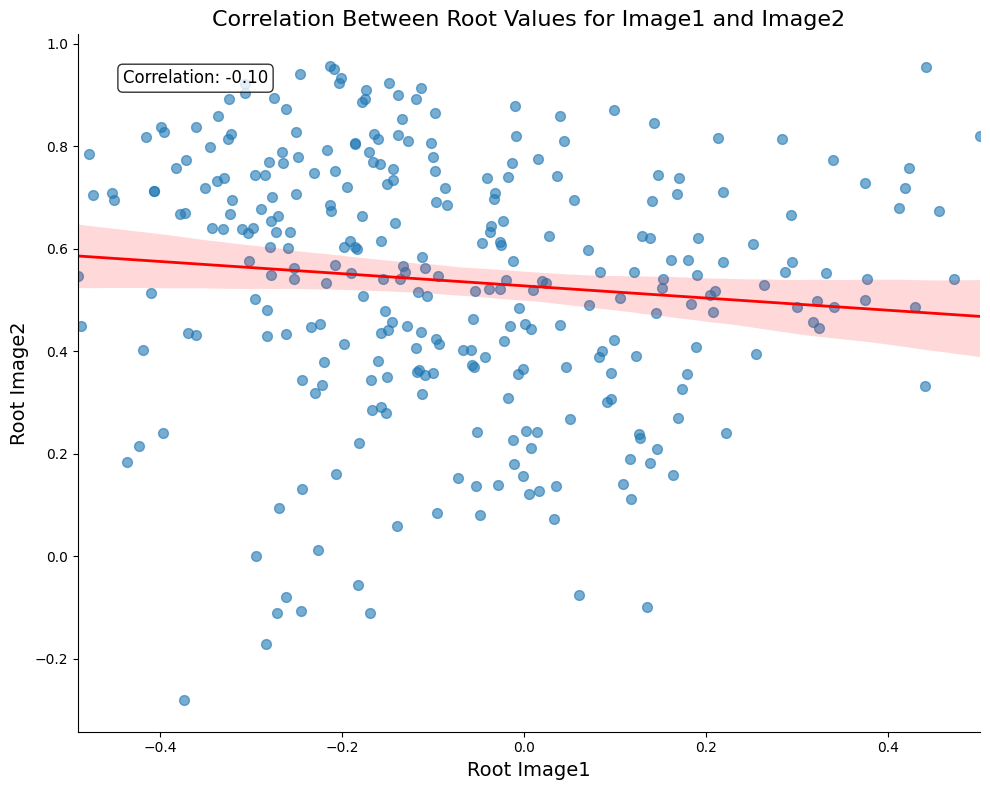

In [26]:
fig = create_correlation_scatterplot(df_sim_pilot2_filt, 'Image1', 'Image2', 'IT_root_Image1', 'IT_root_Image2')
plt.show()

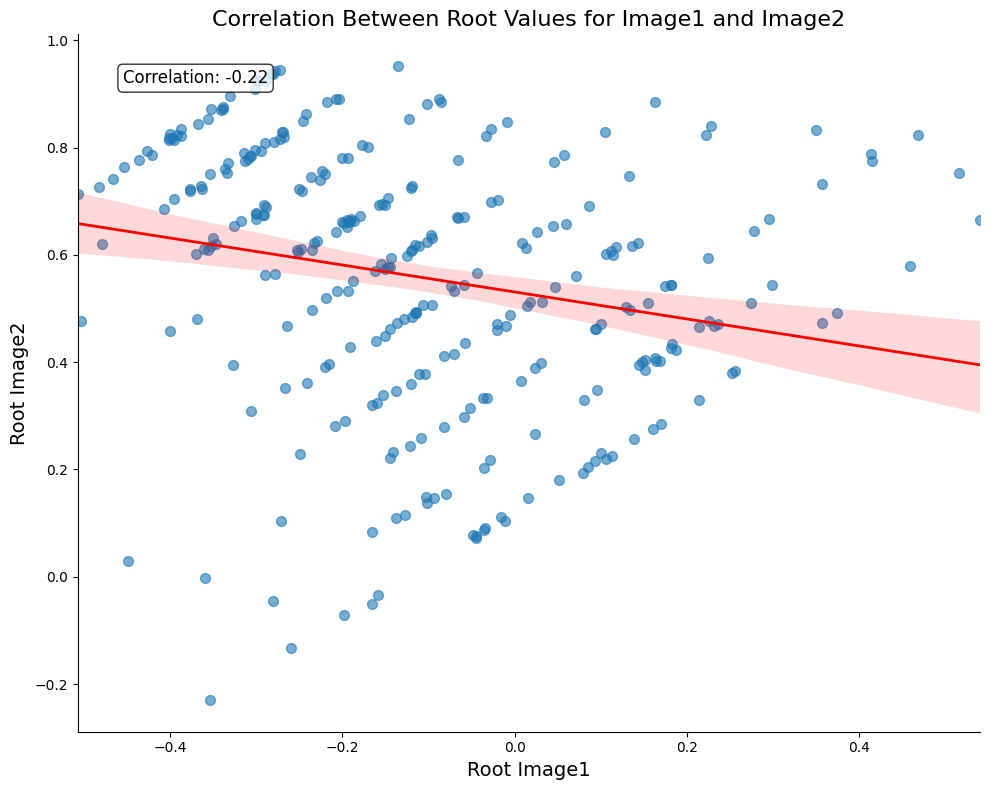

In [27]:
fig = create_correlation_scatterplot(df_triplets, 'Image1', 'Image2', 'IT_root_im1', 'IT_root_im2')
plt.show()

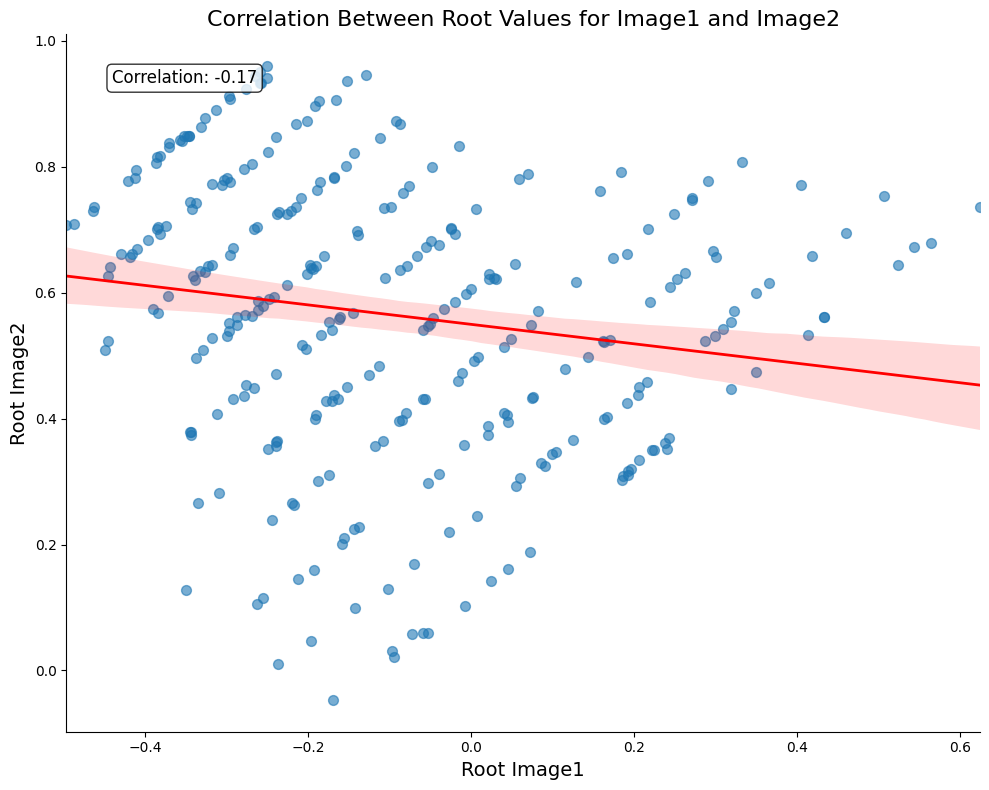

,IT_diff,V2_diff,root,Image1,Image2,IT_root_im1,IT_root_im2,IT_im1_im2,V2_root_im1,V2_root_im2,V2_im1_im2,cat_root,cat_im1,cat_im2,V2_im2_minus_im1,IT_im2_minus_im1,IT_most_similar,V2_most_similar
0,0.111939,0.013220,0_1.jpg,0_2.jpg,0_3.jpg,0.240558,0.352497,0.185131,0.058170,0.071390,0.085188,pincushion,mouse1,quiche,0.013220,0.111939,im2,im2
1,0.128282,0.011144,1_1.jpg,1_2.jpg,1_3.jpg,0.222174,0.350456,0.357306,0.061873,0.050730,0.041748,headband,sarcophagus,button1,-0.011144,0.128282,im2,im1
2,0.122973,0.020906,2_1.jpg,2_2.jpg,2_3.jpg,0.186177,0.309150,0.802512,0.081573,0.060667,0.087287,saw,bok_choy,banana,-0.020906,0.122973,im2,im1
3,0.110383,0.032432,3_1.jpg,3_2.jpg,3_3.jpg,-0.008111,0.102273,0.372528,0.117498,0.149930,0.089741,nose,basket,exerciser,0.032432,0.110383,im2,im2
4,0.116554,0.036084,4_1.jpg,4_2.jpg,4_3.jpg,0.024898,0.141452,0.340568,0.051207,0.087291,0.073804,quill,camera2,basketball_hoop,0.036084,0.116554,im2,im2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.191488,0.138514,295_1.jpg,295_2.jpg,295_3.jpg,-0.258719,0.932769,-0.180517,0.071569,0.210083,0.058767,fly,lunchbox,fly,0.138514,1.191488,im2,im2
296,1.209975,0.141660,296_1.jpg,296_2.jpg,296_3.jpg,-0.259133,0.950842,-0.312464,0.095571,0.237231,0.086216,buoy,snail,buoy,0.141660,1.209975,im2,im2
297,1.202078,0.142542,297_1.jpg,297_2.jpg,297_3.jpg,-0.386109,0.815970,-0.355000,0.042463,0.185005,0.076255,chute,slug,flagpole,0.142542,1.202078,im2,im2
298,1.192490,0.138244,298_1.jpg,298_2.jpg,298_3.jpg,-0.386837,0.805653,-0.405729,0.092372,0.230617,0.091495,shelf,bat1,envelope,0.138244,1.192490,im2,im2


In [28]:
fig = create_correlation_scatterplot(df_triplets_new, 'Image1', 'Image2', 'IT_root_im1', 'IT_root_im2')
plt.show()
df_triplets_new

In [29]:
import pandas as pd
import re

def sort_df_by_root(df, root_col='root'):
    """
    Sort a dataframe by the numerical value in the root column.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to sort
    root_col : str, default='root'
        The column name containing root values like '0_1.jpg', '1_1.jpg', etc.
        
    Returns:
    --------
    pandas.DataFrame
        A sorted copy of the input dataframe
    """
    # Make a copy of the dataframe
    df_sorted = df.copy()
    
    # Extract numeric value from root for proper sorting
    def extract_number(root_name):
        match = re.match(r'(\d+)_\d+\.jpg', root_name)
        if match:
            return int(match.group(1))
        return float('inf')  # Put unmatched patterns at the end
    
    # Add a temporary sorting column
    df_sorted['sort_key'] = df_sorted[root_col].apply(extract_number)
    
    # Sort by the numeric key
    df_sorted = df_sorted.sort_values('sort_key').reset_index(drop=True)
    
    # Remove the temporary sorting column
    df_sorted = df_sorted.drop(columns=['sort_key'])
    
    return df_sorted

# Usage:
df_sim_pilot1_filt_sorted = sort_df_by_root(df_sim_pilot1_filt)
df_sim_pilot2_filt_sorted = sort_df_by_root(df_sim_pilot2_filt)

In [30]:
df_sim_pilot1_filt_sorted

,pilot_number,participant,resp_correct,attend,reliability,validity,clickedImg,root,Image1,Image2,...,IT_clicked_Image2,V2_clicked_root,V2_clicked_Image1,V2_clicked_Image2,IT_root_Image1,IT_root_Image2,IT_Image1_Image2,V2_root_Image1,V2_root_Image2,V2_Image1_Image2
0,1,130567,1.0,img2,0.833333,valid,0_3.jpg,0_1.jpg,0_2.jpg,0_3.jpg,...,1.000000,0.071889,0.085110,1.000000,0.209676,0.344346,0.142472,0.057464,0.071889,0.085110
1,1,146338,0.0,img1,0.833333,valid,distractors/sarcophagus_01b.jpg,1_1.jpg,1_2.jpg,1_3.jpg,...,0.323623,0.088866,0.204078,0.051897,0.218829,0.316150,0.323670,0.062076,0.049786,0.041620
2,1,166183,1.0,img1,0.833333,valid,2_2.jpg,2_1.jpg,2_2.jpg,2_3.jpg,...,0.803053,0.070837,1.000000,0.085897,-0.008713,0.043634,0.803053,0.070837,0.066884,0.085897
3,1,151240,1.0,img2,0.833333,valid,3_3.jpg,3_1.jpg,3_2.jpg,3_3.jpg,...,1.000000,0.149089,0.089227,1.000000,0.015800,0.122354,0.358808,0.120274,0.149089,0.089227
4,1,166183,1.0,img1,0.833333,valid,4_2.jpg,4_1.jpg,4_2.jpg,4_3.jpg,...,0.320632,0.049936,1.000000,0.073637,0.008801,0.128412,0.320632,0.049936,0.084243,0.073637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,164722,1.0,img2,0.833333,valid,295_3.jpg,295_1.jpg,295_2.jpg,295_3.jpg,...,1.000000,0.107047,0.058677,1.000000,-0.108974,0.654824,-0.186018,0.048967,0.107047,0.058677
296,1,160468,1.0,img2,0.666667,valid,296_3.jpg,296_1.jpg,296_2.jpg,296_3.jpg,...,1.000000,0.236075,0.085179,1.000000,-0.273058,0.954942,-0.312895,0.096223,0.236075,0.085179
297,1,121021,1.0,img1,0.833333,valid,297_2.jpg,297_1.jpg,297_2.jpg,297_3.jpg,...,-0.362116,0.042006,1.000000,0.078367,-0.417806,0.807673,-0.362116,0.042006,0.182588,0.078367
298,1,163984,0.0,img2,0.666667,invalid,distractors/bat1_07s.jpg,298_1.jpg,298_2.jpg,298_3.jpg,...,-0.237041,0.093372,0.085316,0.095604,-0.259401,0.650819,-0.427365,0.082850,0.123890,0.089190


In [31]:
df_triplets_new

,IT_diff,V2_diff,root,Image1,Image2,IT_root_im1,IT_root_im2,IT_im1_im2,V2_root_im1,V2_root_im2,V2_im1_im2,cat_root,cat_im1,cat_im2,V2_im2_minus_im1,IT_im2_minus_im1,IT_most_similar,V2_most_similar
0,0.111939,0.013220,0_1.jpg,0_2.jpg,0_3.jpg,0.240558,0.352497,0.185131,0.058170,0.071390,0.085188,pincushion,mouse1,quiche,0.013220,0.111939,im2,im2
1,0.128282,0.011144,1_1.jpg,1_2.jpg,1_3.jpg,0.222174,0.350456,0.357306,0.061873,0.050730,0.041748,headband,sarcophagus,button1,-0.011144,0.128282,im2,im1
2,0.122973,0.020906,2_1.jpg,2_2.jpg,2_3.jpg,0.186177,0.309150,0.802512,0.081573,0.060667,0.087287,saw,bok_choy,banana,-0.020906,0.122973,im2,im1
3,0.110383,0.032432,3_1.jpg,3_2.jpg,3_3.jpg,-0.008111,0.102273,0.372528,0.117498,0.149930,0.089741,nose,basket,exerciser,0.032432,0.110383,im2,im2
4,0.116554,0.036084,4_1.jpg,4_2.jpg,4_3.jpg,0.024898,0.141452,0.340568,0.051207,0.087291,0.073804,quill,camera2,basketball_hoop,0.036084,0.116554,im2,im2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.191488,0.138514,295_1.jpg,295_2.jpg,295_3.jpg,-0.258719,0.932769,-0.180517,0.071569,0.210083,0.058767,fly,lunchbox,fly,0.138514,1.191488,im2,im2
296,1.209975,0.141660,296_1.jpg,296_2.jpg,296_3.jpg,-0.259133,0.950842,-0.312464,0.095571,0.237231,0.086216,buoy,snail,buoy,0.141660,1.209975,im2,im2
297,1.202078,0.142542,297_1.jpg,297_2.jpg,297_3.jpg,-0.386109,0.815970,-0.355000,0.042463,0.185005,0.076255,chute,slug,flagpole,0.142542,1.202078,im2,im2
298,1.192490,0.138244,298_1.jpg,298_2.jpg,298_3.jpg,-0.386837,0.805653,-0.405729,0.092372,0.230617,0.091495,shelf,bat1,envelope,0.138244,1.192490,im2,im2


Object `axis` not found.


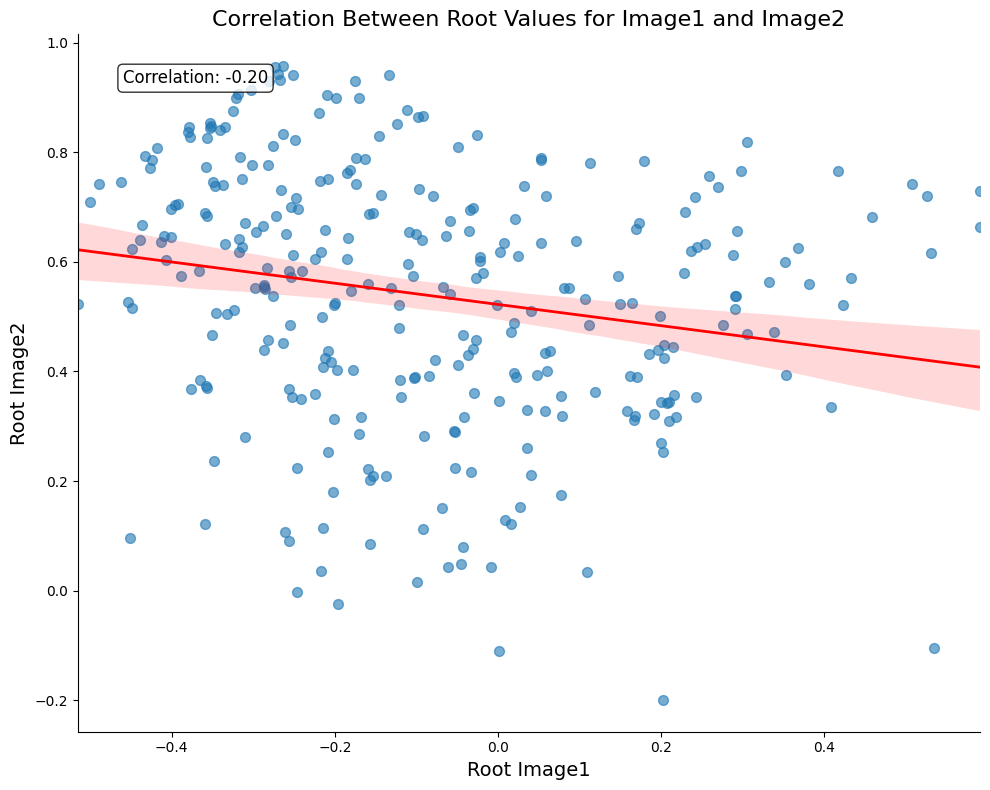

In [32]:
fig = create_correlation_scatterplot(df_sim_pilot1_filt_sorted, 'Image1', 'Image2', 'IT_root_Image1', 'IT_root_Image2')

can we have IT_root_Image1 from df_sim_pilot1_filt_sorted on x axis versus IT_root_im1 from df_triplets_new on y axis?
plt.show()

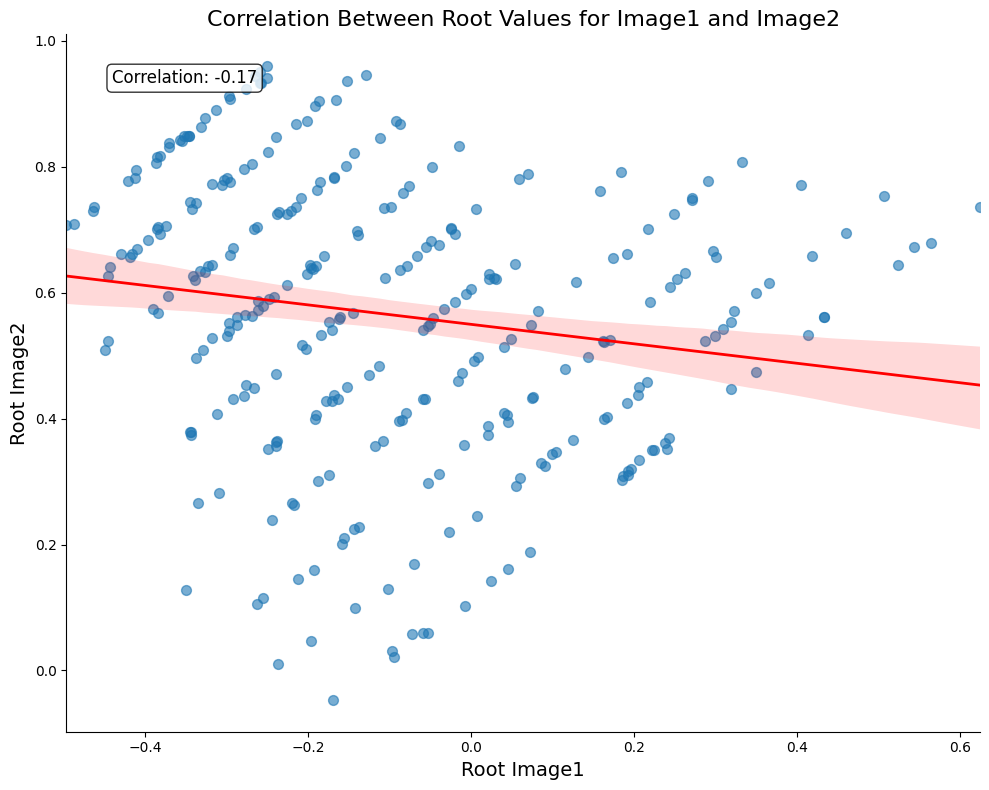

In [33]:
fig = create_correlation_scatterplot(df_triplets_new, 'Image1', 'Image2', 'IT_root_im1', 'IT_root_im2')
plt.show()

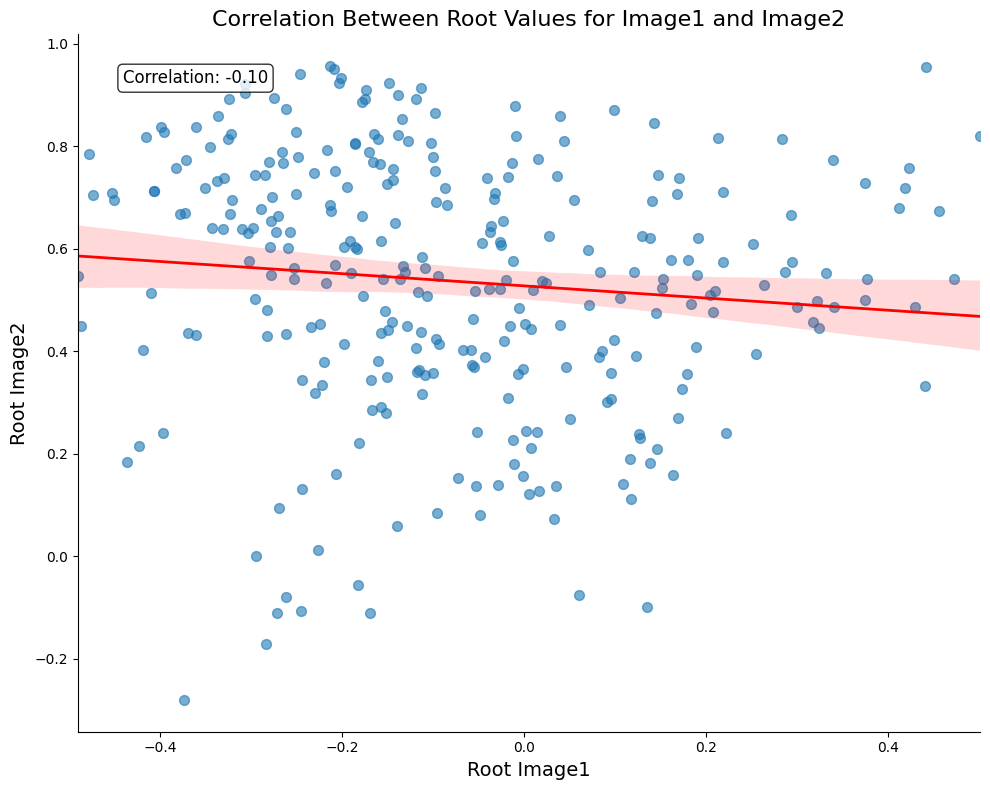

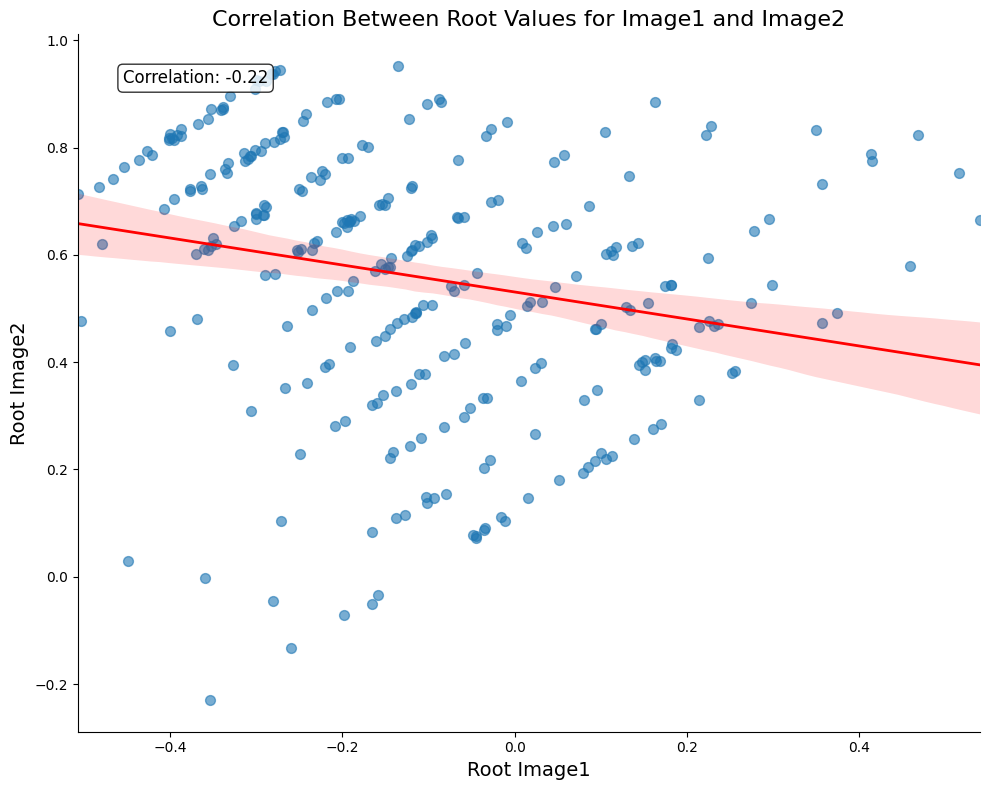

In [34]:
fig = create_correlation_scatterplot(df_sim_pilot2_filt_sorted, 'Image1', 'Image2', 'IT_root_Image1', 'IT_root_Image2')
plt.show()
fig = create_correlation_scatterplot(df_triplets, 'Image1', 'Image2', 'IT_root_im1', 'IT_root_im2')
plt.show()

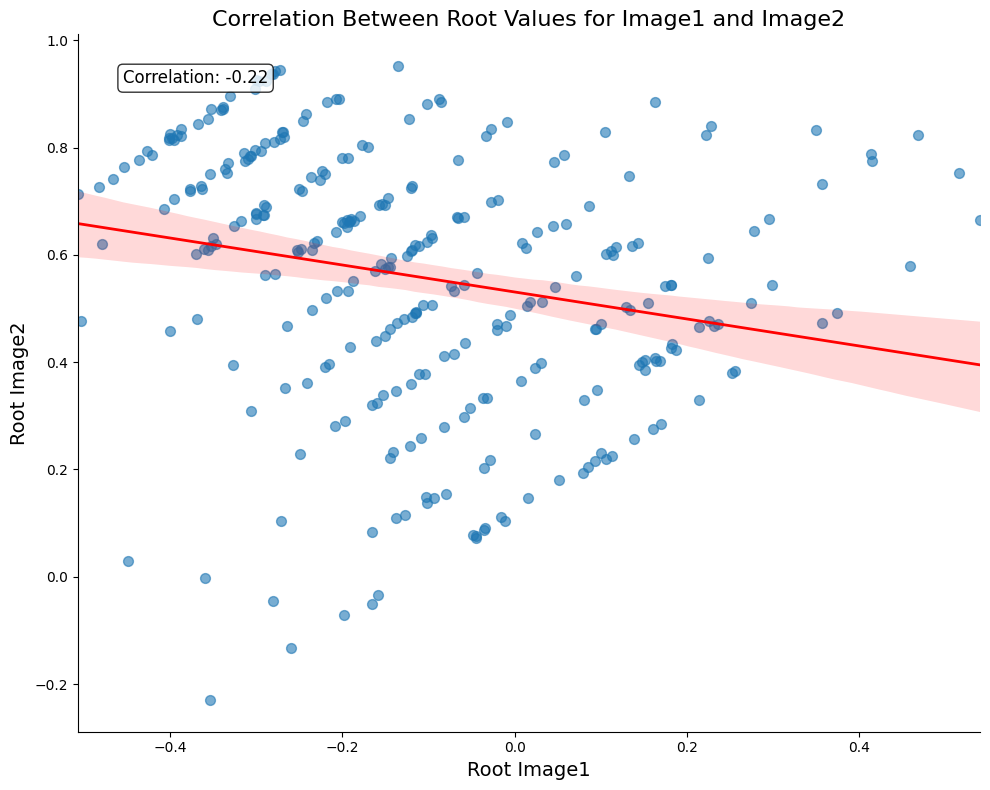

In [35]:
fig = create_correlation_scatterplot(df_triplets, 'Image1', 'Image2', 'IT_root_im1', 'IT_root_im2')
plt.show()

In [36]:

def create_comparison_heatmap(df1, df2, sim_cols1, sim_cols2, title1="Dataset 1", title2="Dataset 2", figsize=(15, 8)):
    """
    Create a side-by-side heatmap comparison of two datasets.
    
    Parameters:
    -----------
    df1, df2 : pandas.DataFrame
        The two dataframes to compare
    sim_cols1, sim_cols2 : list of str
        The similarity columns in each dataframe to include in the correlation analysis
        (these should be numeric columns only)
    title1, title2 : str
        Titles for each dataset
    figsize : tuple
        Figure size for the plot
    
    Returns:
    --------
    matplotlib.figure.Figure
        The heatmap figure
    """
    # Verify the columns exist and are numeric
    for col in sim_cols1:
        if col not in df1.columns:
            raise ValueError(f"Column '{col}' not found in first dataframe")
        if not np.issubdtype(df1[col].dtype, np.number):
            raise ValueError(f"Column '{col}' in first dataframe is not numeric")
            
    for col in sim_cols2:
        if col not in df2.columns:
            raise ValueError(f"Column '{col}' not found in second dataframe")
        if not np.issubdtype(df2[col].dtype, np.number):
            raise ValueError(f"Column '{col}' in second dataframe is not numeric")
    
    # Compute correlation matrices
    corr1 = df1[sim_cols1].corr()
    corr2 = df2[sim_cols2].corr()
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Custom colormap with diverging colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Plot heatmaps
    sns.heatmap(corr1, annot=True, fmt=".2f", cmap=cmap, square=True, 
                linewidths=.5, cbar_kws={"shrink": .8}, ax=ax1, vmin=-1, vmax=1)
    sns.heatmap(corr2, annot=True, fmt=".2f", cmap=cmap, square=True, 
                linewidths=.5, cbar_kws={"shrink": .8}, ax=ax2, vmin=-1, vmax=1)
    
    # Set titles
    ax1.set_title(title1, fontsize=14, fontweight='bold')
    ax2.set_title(title2, fontsize=14, fontweight='bold')
    
    # Adjust layout
    fig.tight_layout()
    
    return fig


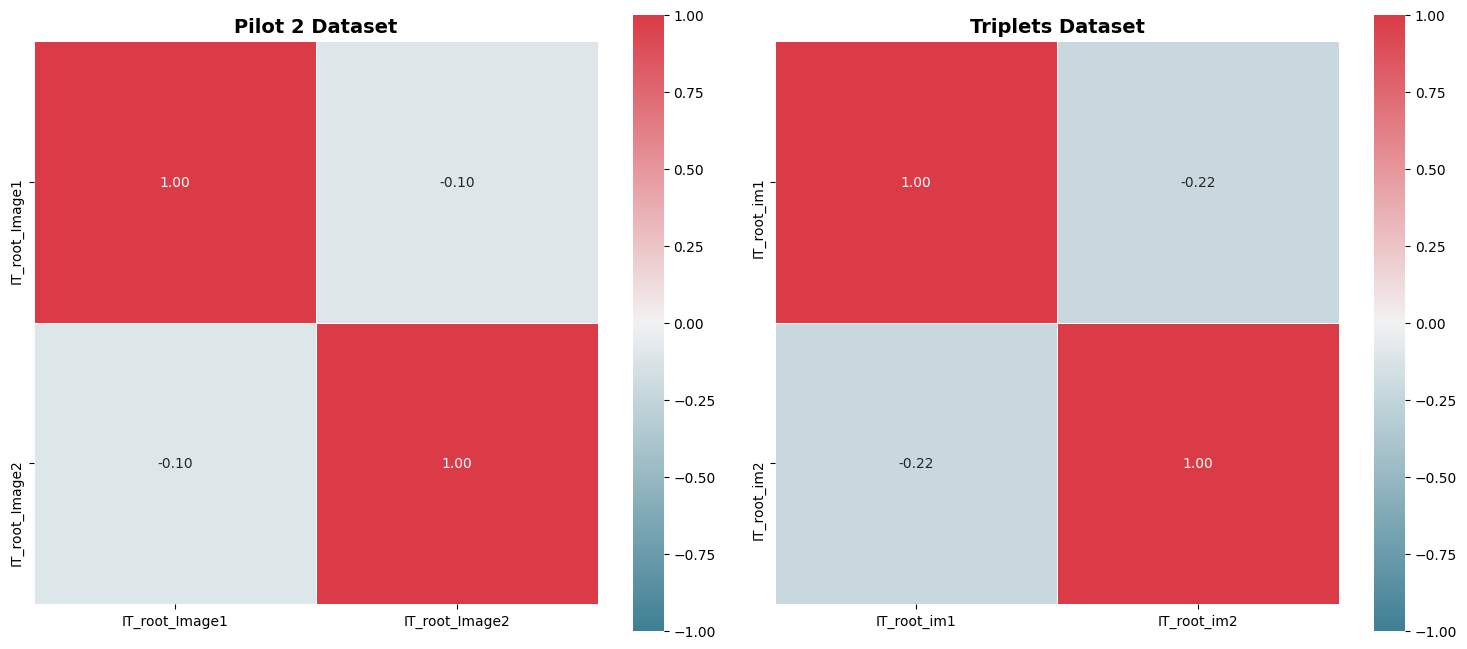

In [37]:


fig = create_comparison_heatmap(
    df_sim_pilot2_filt_sorted, 
    df_triplets,
    ['IT_root_Image1', 'IT_root_Image2'],  # Only include similarity columns
    ['IT_root_im1', 'IT_root_im2'],        # Only include similarity columns
    title1="Pilot 2 Dataset",
    title2="Triplets Dataset"
)
plt.show()

In [38]:
def identify_largest_differences(df1, df2, sim_cols1, sim_cols2, n=10, root_col1='root', root_col2='root'):
    """
    Identify images with the largest differences in IT root similarity values.
    
    Parameters:
    -----------
    df1, df2 : pandas.DataFrame
        The two dataframes to compare
    sim_cols1, sim_cols2 : list of str
        Column names containing similarity values to compare (two for each dataset)
    n : int
        Number of top differences to return
    root_col1, root_col2 : str
        Column names containing image identifiers
        
    Returns:
    --------
    pandas.DataFrame
        A dataframe with the largest differences
    """
    # Make sure both dataframes have enough rows
    min_len = min(len(df1), len(df2))
    if min_len < 1:
        raise ValueError("Both dataframes must have at least one row")
    
    # Extract the values for comparison
    df_compare = pd.DataFrame({
        'Image_ID_1': df1[root_col1].values[:min_len],
        'Image_ID_2': df2[root_col2].values[:min_len] if root_col2 in df2.columns else ['N/A'] * min_len,
        f'{sim_cols1[0]}': df1[sim_cols1[0]].values[:min_len],
        f'{sim_cols2[0]}': df2[sim_cols2[0]].values[:min_len],
        f'{sim_cols1[1]}': df1[sim_cols1[1]].values[:min_len],
        f'{sim_cols2[1]}': df2[sim_cols2[1]].values[:min_len],
    })
    
    # Calculate differences
    df_compare[f'Diff_{sim_cols1[0]}'] = df_compare[sim_cols1[0]] - df_compare[sim_cols2[0]]
    df_compare[f'Diff_{sim_cols1[1]}'] = df_compare[sim_cols1[1]] - df_compare[sim_cols2[1]]
    df_compare['Abs_Diff_1'] = np.abs(df_compare[f'Diff_{sim_cols1[0]}'])
    df_compare['Abs_Diff_2'] = np.abs(df_compare[f'Diff_{sim_cols1[1]}'])
    df_compare['Mean_Abs_Diff'] = (df_compare['Abs_Diff_1'] + df_compare['Abs_Diff_2']) / 2
    
    # Sort by mean absolute difference
    df_sorted = df_compare.sort_values('Mean_Abs_Diff', ascending=False)
    
    # Return top n rows
    return df_sorted.head(n)


In [39]:

largest_diffs = identify_largest_differences(
    df_sim_pilot2_filt_sorted,
    df_triplets,
    ['IT_root_Image1', 'IT_root_Image2'],
    ['IT_root_im1', 'IT_root_im2'],
    n=10,
    root_col1='root',
    root_col2='root'  # Adjust if the column name is different
)
print(largest_diffs)

    Image_ID_1 Image_ID_2  IT_root_Image1  IT_root_im1  IT_root_Image2  \
164  164_1.jpg  164_1.jpg        0.294352    -0.157889        0.573524   
135  135_1.jpg  135_1.jpg       -0.397548    -0.111564        0.239450   
58    58_1.jpg   58_1.jpg        0.183129    -0.120836        0.491653   
35    35_1.jpg   35_1.jpg        0.455941     0.113938        0.672468   
252  252_1.jpg  252_1.jpg        0.054877    -0.187671        0.694878   
39    39_1.jpg   39_1.jpg        0.126702    -0.249590        0.231027   
4      4_1.jpg    4_1.jpg        0.135161    -0.035711       -0.098401   
55    55_1.jpg   55_1.jpg        0.441467     0.162846        0.953954   
65    65_1.jpg   65_1.jpg       -0.096909    -0.229870        0.424527   
37    37_1.jpg   37_1.jpg        0.167680     0.031978        0.707403   

     IT_root_im2  Diff_IT_root_Image1  Diff_IT_root_Image2  Abs_Diff_1  \
164     0.693633             0.452241            -0.120110    0.452241   
135     0.377917            -0.285984

In [40]:

largest_diffs = identify_largest_differences(
    df_sim_pilot2_filt_sorted,
    df_triplets,
    ['V2_root_Image1', 'V2_root_Image2'],
    ['V2_root_im1', 'V2_root_im2'],
    n=10,
    root_col1='root',
    root_col2='root'  # Adjust if the column name is different
)
print(largest_diffs)

    Image_ID_1 Image_ID_2  V2_root_Image1  V2_root_im1  V2_root_Image2  \
182  182_1.jpg  182_1.jpg        0.116236     0.025510        0.354682   
174  174_1.jpg  174_1.jpg        0.168160     0.107743        0.173229   
67    67_1.jpg   67_1.jpg        0.160926     0.124315        0.139699   
241  241_1.jpg  241_1.jpg        0.119470     0.045335        0.172926   
132  132_1.jpg  132_1.jpg        0.144064     0.075874        0.138541   
289  289_1.jpg  289_1.jpg        0.068885     0.112679        0.145299   
177  177_1.jpg  177_1.jpg        0.108423     0.061929        0.298445   
58    58_1.jpg   58_1.jpg        0.124273     0.029944        0.215912   
258  258_1.jpg  258_1.jpg        0.129547    -0.006412        0.132206   
100  100_1.jpg  100_1.jpg        0.126470     0.011838        0.045124   

     V2_root_im2  Diff_V2_root_Image1  Diff_V2_root_Image2  Abs_Diff_1  \
182     0.069247             0.090726             0.285434    0.090726   
174     0.025041             0.060417

In [41]:
df_sim_pilot2_filt_sorted

,pilot_number,participant,resp_correct,attend,reliability,validity,clickedImg,root,Image1,Image2,...,IT_clicked_Image2,V2_clicked_root,V2_clicked_Image1,V2_clicked_Image2,IT_root_Image1,IT_root_Image2,IT_Image1_Image2,V2_root_Image1,V2_root_Image2,V2_Image1_Image2
0,2,168073,1.0,img1,0.833333,invalid,0_3.jpg,0_1.jpg,0_2.jpg,0_3.jpg,...,1.000000,0.089343,0.063607,1.000000,0.173149,0.325755,-0.065138,0.051236,0.089343,0.063607
1,2,170515,1.0,img1,0.833333,valid,1_2.jpg,1_1.jpg,1_2.jpg,1_3.jpg,...,0.335607,0.086037,1.000000,0.063427,-0.262167,-0.079130,0.335607,0.086037,0.098381,0.063427
2,2,149656,1.0,img2,0.833333,valid,2_3.jpg,2_1.jpg,2_2.jpg,2_3.jpg,...,1.000000,0.081207,0.093715,1.000000,-0.170110,-0.110802,0.311398,0.071740,0.081207,0.093715
3,2,148036,0.0,img1,0.833333,valid,distractors/antelope_05n.jpg,3_1.jpg,3_2.jpg,3_3.jpg,...,0.144992,0.067781,0.091557,0.059583,-0.096406,0.084063,-0.049673,0.098136,0.057429,0.078504
4,2,147487,0.0,img1,0.666667,invalid,distractors/camera2_07s.jpg,4_1.jpg,4_2.jpg,4_3.jpg,...,0.813378,0.056064,0.054844,0.103009,0.135161,-0.098401,0.276264,0.079418,0.048422,0.049256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,152719,1.0,img2,0.833333,invalid,295_2.jpg,295_1.jpg,295_2.jpg,295_3.jpg,...,-0.333916,0.131432,1.000000,0.063744,-0.407105,0.712929,-0.333916,0.131432,0.094692,0.063744
296,2,133036,1.0,img2,0.666667,invalid,296_2.jpg,296_1.jpg,296_2.jpg,296_3.jpg,...,-0.250383,0.045825,1.000000,0.048005,-0.324047,0.890897,-0.250383,0.045825,0.106148,0.048005
297,2,152644,1.0,img2,0.666667,valid,297_3.jpg,297_1.jpg,297_2.jpg,297_3.jpg,...,1.000000,0.104052,0.043170,1.000000,-0.185624,0.806413,-0.339524,0.042255,0.104052,0.043170
298,2,167956,1.0,img2,0.666667,valid,298_3.jpg,298_1.jpg,298_2.jpg,298_3.jpg,...,1.000000,0.176133,0.112116,1.000000,-0.113887,0.912939,-0.032612,0.077806,0.176133,0.112116


In [42]:
df_triplets

,IT_diff,V2_diff,root,Image1,Image2,IT_root_im1,IT_root_im2,IT_im1_im2,V2_root_im1,V2_root_im2,...,cat_root,cat_im1,cat_im2,concept_root,concept_im1,concept_im2,V2_im2_minus_im1,IT_im2_minus_im1,IT_most_similar,V2_most_similar
0,0.112945,0.024705,0_1.jpg,0_2.jpg,0_3.jpg,0.105832,0.218778,-0.086586,0.065104,0.089809,...,gravestone,pajamas,javelin,Unclassified,clothing,sports equipment,0.024705,0.112945,im2,im2
1,0.127330,0.029331,1_1.jpg,1_2.jpg,1_3.jpg,-0.198247,-0.070917,0.423048,0.088680,0.059349,...,submarine,sardine,mask,vehicle,Unclassified,clothing,-0.029331,0.127330,im2,im1
2,0.123257,0.042607,2_1.jpg,2_2.jpg,2_3.jpg,-0.353060,-0.229803,0.410662,0.052227,0.009619,...,alpaca,calzone,lip_balm,animal,Unclassified,Unclassified,-0.042607,0.123257,im2,im1
3,0.120909,0.054896,3_1.jpg,3_2.jpg,3_3.jpg,-0.044691,0.076218,-0.087011,0.076088,0.021192,...,bazooka,antelope,highchair,Unclassified,animal,furniture,-0.054896,0.120909,im2,im1
4,0.122368,0.073450,4_1.jpg,4_2.jpg,4_3.jpg,-0.035711,0.086657,0.212700,0.080138,0.006688,...,rat,hubcap,camera2,animal,Unclassified,animal,-0.073450,0.122368,im2,im1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.220836,0.089642,295_1.jpg,295_2.jpg,295_3.jpg,-0.506964,0.713872,-0.346397,0.107195,0.017553,...,sheet,catfish,pillow,Unclassified,animal,Unclassified,-0.089642,1.220836,im2,im1
296,1.210127,0.114098,296_1.jpg,296_2.jpg,296_3.jpg,-0.338554,0.871573,-0.286020,0.062489,0.176587,...,tarantula,bumper,tarantula,animal,Unclassified,animal,0.114098,1.210127,im2,im2
297,1.225407,0.121336,297_1.jpg,297_2.jpg,297_3.jpg,-0.399383,0.826024,-0.321291,0.024199,0.145535,...,pasta,stump,baklava,Unclassified,Unclassified,Unclassified,0.121336,1.225407,im2,im2
298,1.227144,0.148427,298_1.jpg,298_2.jpg,298_3.jpg,-0.330236,0.896908,-0.267696,0.072962,0.221388,...,train_car,fish,train_car,Unclassified,animal,Unclassified,0.148427,1.227144,im2,im2


In [43]:

largest_diffs = identify_largest_differences(
    df_sim_pilot1_filt_sorted,
    df_triplets_new,
    ['IT_root_Image1', 'IT_root_Image2'],
    ['IT_root_im1', 'IT_root_im2'],
    n=10,
    root_col1='root',
    root_col2='root'  # Adjust if the column name is different
)
print(largest_diffs)

    Image_ID_1 Image_ID_2  IT_root_Image1  IT_root_im1  IT_root_Image2  \
128  128_1.jpg  128_1.jpg        0.535180    -0.059553       -0.105622   
130  130_1.jpg  130_1.jpg        0.202774    -0.033151       -0.199653   
237  237_1.jpg  237_1.jpg        0.200464    -0.303230        0.343541   
61    61_1.jpg   61_1.jpg        0.108658     0.296996        0.033114   
24    24_1.jpg   24_1.jpg        0.214669    -0.094800        0.443760   
221  221_1.jpg  221_1.jpg       -0.450613    -0.416722        0.095490   
107  107_1.jpg  107_1.jpg        0.001604    -0.220253       -0.110060   
158  158_1.jpg  158_1.jpg        0.167197    -0.162394        0.311085   
2      2_1.jpg    2_1.jpg       -0.008713     0.186177        0.043634   
115  115_1.jpg  115_1.jpg        0.040987    -0.051103        0.211779   

     IT_root_im2  Diff_IT_root_Image1  Diff_IT_root_Image2  Abs_Diff_1  \
128     0.540382             0.594732            -0.646004    0.594732   
130     0.574394             0.235925

In [44]:
def analyze_column_range(df, column_name, plot=True, figsize=(10, 6)):
   
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the dataframe")
    
    series = df[column_name]
    
    # Check if the values are numeric
    if not pd.api.types.is_numeric_dtype(series):
        raise ValueError(f"Column '{column_name}' is not numeric")
    
    # Calculate range statistics
    min_val = series.min()
    max_val = series.max()
    range_width = max_val - min_val
    
    # Get more detailed statistics
    stats = series.describe()
    
    # Create a results dictionary
    results = {
        'min': min_val,
        'max': max_val,
        'range': range_width,
        'mean': stats['mean'],
        'median': stats['50%'],
        'std': stats['std'],
        'count': stats['count'],
        'quartiles': {
            'q1': stats['25%'],
            'q2': stats['50%'],
            'q3': stats['75%']
        },
        'interquartile_range': stats['75%'] - stats['25%']
    }
    
    # Print summary
    print(f"Analysis of column: {column_name}")
    print(f"Range: {min_val:.4f} to {max_val:.4f}")
    print(f"Range width: {range_width:.4f}")
    print(f"Mean: {results['mean']:.4f}")
    print(f"Median: {results['median']:.4f}")
    print(f"Standard deviation: {results['std']:.4f}")
    print(f"Interquartile range: {results['interquartile_range']:.4f}")
    
    # Create visualization if requested
    if plot:
        fig, ax = plt.subplots(figsize=figsize)
        
        # Create histogram with KDE
        sns.histplot(series, kde=True, ax=ax)
        
        # Add lines for key statistics
        ax.axvline(min_val, color='blue', linestyle='--', alpha=0.7, label=f'Min: {min_val:.4f}')
        ax.axvline(max_val, color='purple', linestyle='--', alpha=0.7, label=f'Max: {max_val:.4f}')
        ax.axvline(results['mean'], color='red', linestyle='-', alpha=0.7, label=f'Mean: {results["mean"]:.4f}')
        ax.axvline(results['median'], color='green', linestyle='-', alpha=0.7, label=f'Median: {results["median"]:.4f}')
        
        # Add quartiles
        ax.axvline(results['quartiles']['q1'], color='orange', linestyle=':', alpha=0.7, label=f'Q1: {results["quartiles"]["q1"]:.4f}')
        ax.axvline(results['quartiles']['q3'], color='orange', linestyle=':', alpha=0.7, label=f'Q3: {results["quartiles"]["q3"]:.4f}')
        
        # Add shading for interquartile range
        ax.axvspan(results['quartiles']['q1'], results['quartiles']['q3'], alpha=0.2, color='gray', label='IQR')
        
        # Set labels and title
        ax.set_xlabel(column_name, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.set_title(f'Distribution of {column_name} Values', fontsize=14, fontweight='bold')
        
        # Add grid and legend
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best')
        
        plt.tight_layout()
        return results, fig
    
    return results


Analysis of column: V2_root_Image1
Range: 0.0176 to 0.2450
Range width: 0.2274
Mean: 0.0780
Median: 0.0703
Standard deviation: 0.0372
Interquartile range: 0.0447


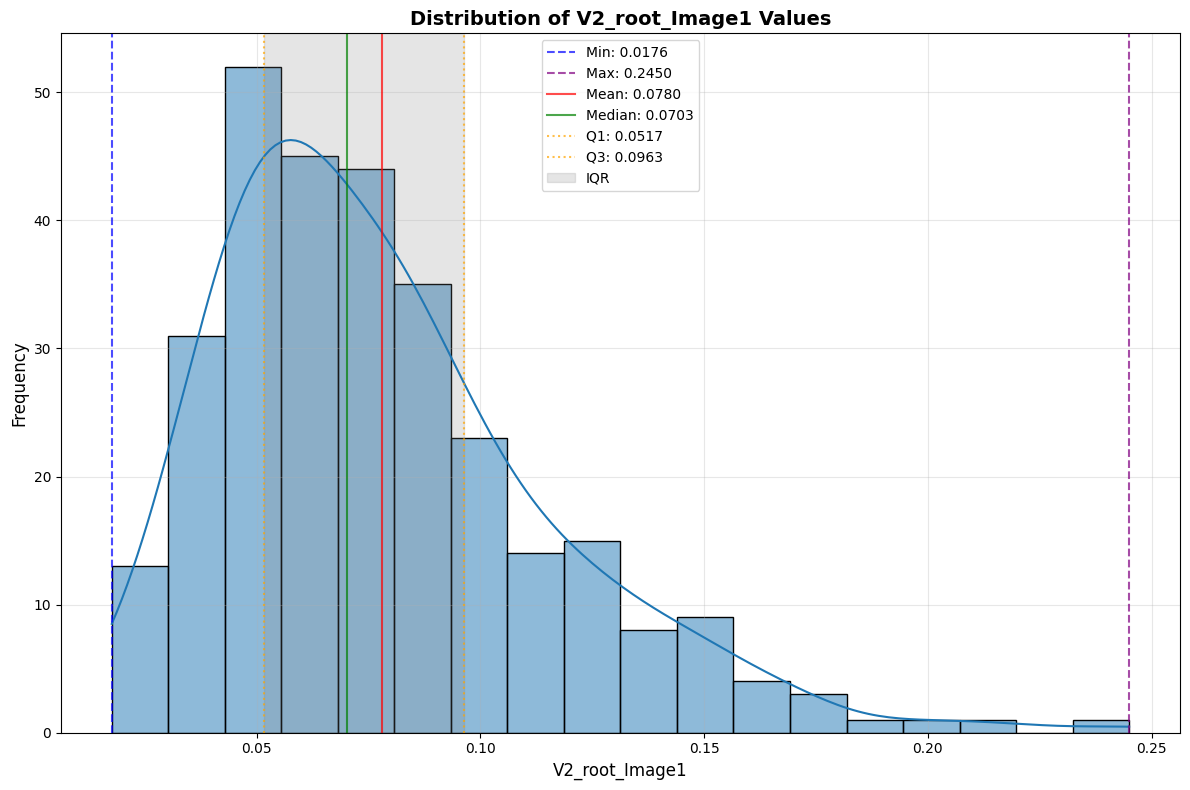

In [45]:

# stats = analyze_column_range(df_sim_pilot2_filt_sorted, 'V2_root_Image1')

# Without plot
# stats = analyze_column_range(df_sim_pilot2_filt_sorted, 'V2_root_Image1', plot=False)

# Custom figure size
stats, fig = analyze_column_range(df_sim_pilot2_filt_sorted, 'V2_root_Image1', figsize=(12, 8))
plt.show()

Analysis of column: V2_root_im1
Range: -0.0264 to 0.2394
Range width: 0.2657
Mean: 0.0666
Median: 0.0623
Standard deviation: 0.0495
Interquartile range: 0.0704


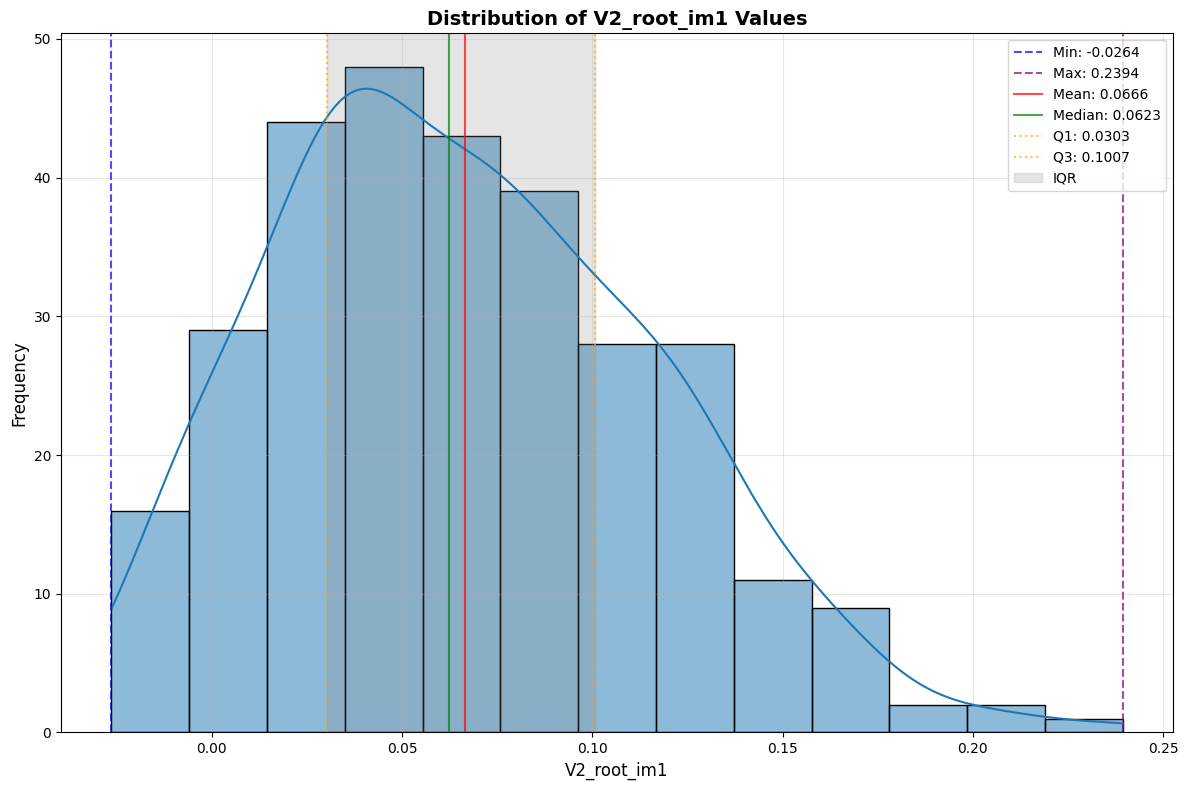

In [46]:
stats, fig = analyze_column_range(df_triplets, 'V2_root_im1', figsize=(12, 8))
plt.show()

In [47]:
from scipy import stats

def create_cross_dataframe_scatterplot(df1, df2, x_col, y_col, title=None):
   
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Extract the data
    x_data = df1[x_col].values
    y_data = df2[y_col].values
    
    # Make sure the data has the same length or handle differently if needed
    min_length = min(len(x_data), len(y_data))
    x_data = x_data[:min_length]
    y_data = y_data[:min_length]
    
    # Calculate correlation coefficient
    correlation, p_value = stats.pearsonr(x_data, y_data)
    
    # Plot the data
    ax.scatter(x_data, y_data, alpha=0.6, color='blue')
    
    # Add regression line
    z = np.polyfit(x_data, y_data, 1)
    p = np.poly1d(z)
    ax.plot(x_data, p(x_data), "r--", alpha=0.8)
    
    # Add correlation information
    ax.text(0.05, 0.95, f'r = {correlation:.3f}, p = {p_value:.3e}', 
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Set labels and title
    ax.set_xlabel(f'{x_col}')
    ax.set_ylabel(f'{y_col}')
    if title:
        ax.set_title(title)
    else:
        ax.set_title(f'Correlation between {x_col} and {y_col}')
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Tight layout
    plt.tight_layout()
    
    return fig



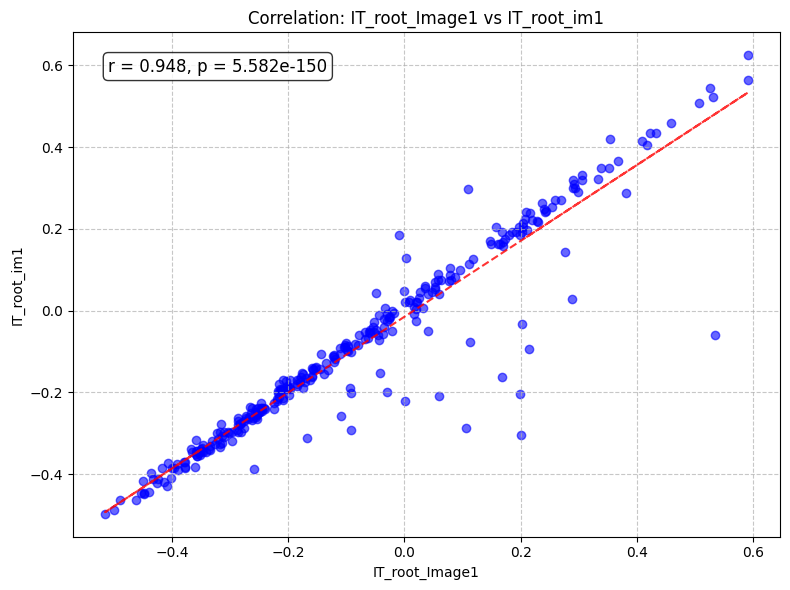

In [48]:
fig = create_cross_dataframe_scatterplot(
    df_sim_pilot1_filt_sorted,
    df_triplets_new,
    'IT_root_Image1',
    'IT_root_im1',
    title='Correlation: IT_root_Image1 vs IT_root_im1'
)
plt.show()



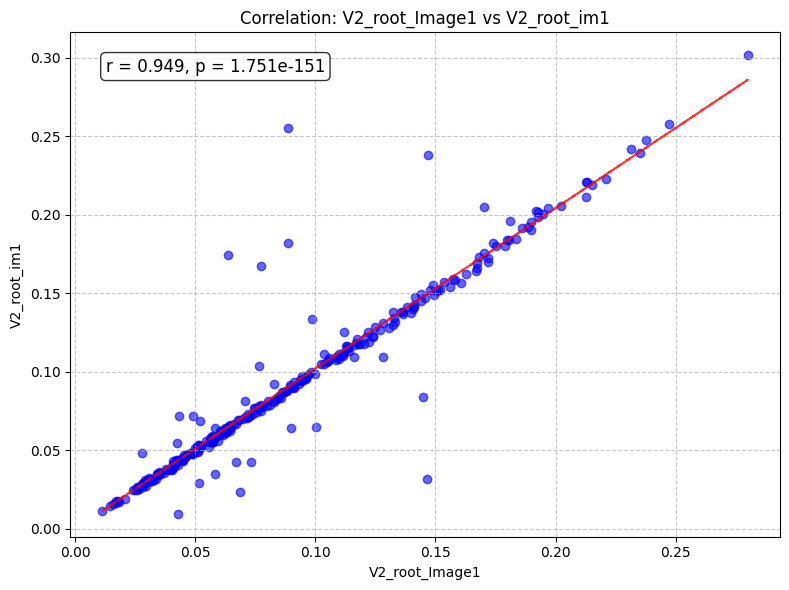

In [52]:
fig = create_cross_dataframe_scatterplot(
    df_sim_pilot1_filt_sorted,
    df_triplets_new,
    'V2_root_Image1',
    'V2_root_im1',
    title='Correlation: V2_root_Image1 vs V2_root_im1'
)
plt.show()


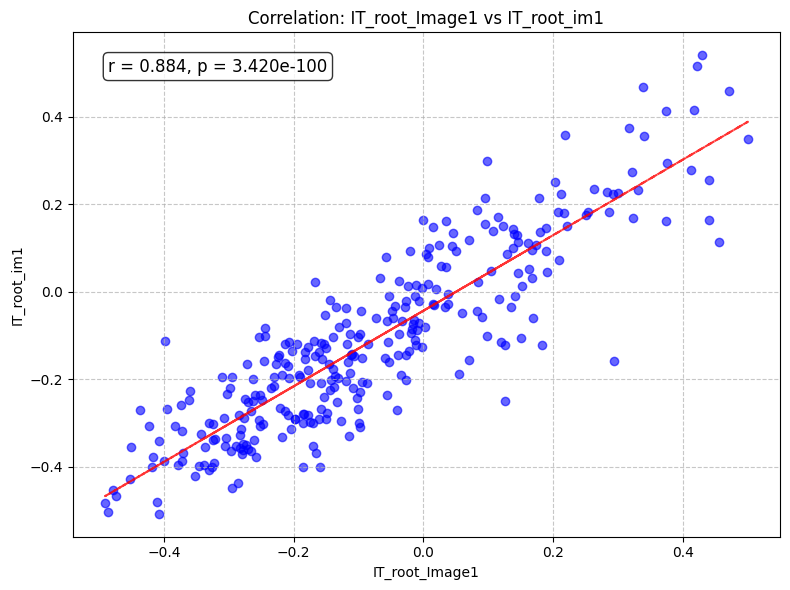

In [54]:
fig = create_cross_dataframe_scatterplot(
    df_sim_pilot2_filt_sorted,
    df_triplets,
    'IT_root_Image1',
    'IT_root_im1',
    title='Correlation: IT_root_Image1 vs IT_root_im1'
)
plt.show()

In [50]:
df_triplets_new


,IT_diff,V2_diff,root,Image1,Image2,IT_root_im1,IT_root_im2,IT_im1_im2,V2_root_im1,V2_root_im2,V2_im1_im2,cat_root,cat_im1,cat_im2,V2_im2_minus_im1,IT_im2_minus_im1,IT_most_similar,V2_most_similar
0,0.111939,0.013220,0_1.jpg,0_2.jpg,0_3.jpg,0.240558,0.352497,0.185131,0.058170,0.071390,0.085188,pincushion,mouse1,quiche,0.013220,0.111939,im2,im2
1,0.128282,0.011144,1_1.jpg,1_2.jpg,1_3.jpg,0.222174,0.350456,0.357306,0.061873,0.050730,0.041748,headband,sarcophagus,button1,-0.011144,0.128282,im2,im1
2,0.122973,0.020906,2_1.jpg,2_2.jpg,2_3.jpg,0.186177,0.309150,0.802512,0.081573,0.060667,0.087287,saw,bok_choy,banana,-0.020906,0.122973,im2,im1
3,0.110383,0.032432,3_1.jpg,3_2.jpg,3_3.jpg,-0.008111,0.102273,0.372528,0.117498,0.149930,0.089741,nose,basket,exerciser,0.032432,0.110383,im2,im2
4,0.116554,0.036084,4_1.jpg,4_2.jpg,4_3.jpg,0.024898,0.141452,0.340568,0.051207,0.087291,0.073804,quill,camera2,basketball_hoop,0.036084,0.116554,im2,im2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.191488,0.138514,295_1.jpg,295_2.jpg,295_3.jpg,-0.258719,0.932769,-0.180517,0.071569,0.210083,0.058767,fly,lunchbox,fly,0.138514,1.191488,im2,im2
296,1.209975,0.141660,296_1.jpg,296_2.jpg,296_3.jpg,-0.259133,0.950842,-0.312464,0.095571,0.237231,0.086216,buoy,snail,buoy,0.141660,1.209975,im2,im2
297,1.202078,0.142542,297_1.jpg,297_2.jpg,297_3.jpg,-0.386109,0.815970,-0.355000,0.042463,0.185005,0.076255,chute,slug,flagpole,0.142542,1.202078,im2,im2
298,1.192490,0.138244,298_1.jpg,298_2.jpg,298_3.jpg,-0.386837,0.805653,-0.405729,0.092372,0.230617,0.091495,shelf,bat1,envelope,0.138244,1.192490,im2,im2


In [51]:

def find_correlation_outliers(df1, df2, col1, col2, method='residual', threshold=2.0):
    """
    Find points that deviate from the correlation line
    
    Parameters:
    - df1, df2: DataFrames containing the data
    - col1, col2: Column names to correlate
    - method: 'residual', 'cook', or 'leverage' for outlier detection
    - threshold: Standard deviations for residual method, or percentile for others
    
    Returns:
    - Dictionary with outlier information
    """
    
    # Merge data on index (assuming aligned indices)
    merged_df = pd.DataFrame({
        'x': df1[col1],
        'y': df2[col2]
    }).dropna()
    
    # Fit linear regression
    X = merged_df['x'].values.reshape(-1, 1)
    y = merged_df['y'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    # Method 1: Residual-based outliers
    if method == 'residual':
        # Standardized residuals
        std_residuals = residuals / np.std(residuals)
        outlier_mask = np.abs(std_residuals) > threshold
        
        outlier_info = {
            'method': 'residual',
            'threshold': threshold,
            'outlier_indices': merged_df.index[outlier_mask].tolist(),
            'outlier_data': merged_df[outlier_mask].copy(),
            'residuals': residuals[outlier_mask],
            'std_residuals': std_residuals[outlier_mask]
        }
    
    # Method 2: Cook's Distance
    elif method == 'cook':
        from statsmodels.stats.outliers_influence import OLSInfluence
        import statsmodels.api as sm
        
        # Fit with statsmodels for diagnostic tools
        X_sm = sm.add_constant(merged_df['x'])
        model_sm = sm.OLS(merged_df['y'], X_sm).fit()
        
        # Calculate Cook's distance
        influence = OLSInfluence(model_sm)
        cooks_d = influence.cooks_distance[0]
        
        # Outliers: Cook's D > 4/n (common threshold)
        cook_threshold = 4.0 / len(merged_df)
        outlier_mask = cooks_d > cook_threshold
        
        outlier_info = {
            'method': 'cook',
            'threshold': cook_threshold,
            'outlier_indices': merged_df.index[outlier_mask].tolist(),
            'outlier_data': merged_df[outlier_mask].copy(),
            'cooks_distance': cooks_d[outlier_mask],
            'residuals': residuals[outlier_mask]
        }
    
    # Method 3: Leverage-based
    elif method == 'leverage':
        # Calculate leverage (hat values)
        X_centered = X - np.mean(X)
        leverage = np.diag(X_centered @ np.linalg.inv(X_centered.T @ X_centered) @ X_centered.T)
        leverage += 1/len(X)  # Add constant term effect
        
        # High leverage threshold: 2p/n where p is number of parameters
        leverage_threshold = 2 * 2 / len(merged_df)  # 2 parameters (slope + intercept)
        outlier_mask = leverage > leverage_threshold
        
        outlier_info = {
            'method': 'leverage',
            'threshold': leverage_threshold,
            'outlier_indices': merged_df.index[outlier_mask].tolist(),
            'outlier_data': merged_df[outlier_mask].copy(),
            'leverage': leverage[outlier_mask],
            'residuals': residuals[outlier_mask]
        }
    
    # Add common information
    outlier_info.update({
        'correlation': np.corrcoef(merged_df['x'], merged_df['y'])[0, 1],
        'r_squared': model.score(X, y),
        'slope': model.coef_[0],
        'intercept': model.intercept_,
        'total_points': len(merged_df),
        'num_outliers': np.sum(outlier_mask)
    })
    
    return outlier_info

def print_outlier_summary(outlier_info):
    """Print a summary of outliers found"""
    print(f"\n{'='*50}")
    print(f"OUTLIER ANALYSIS SUMMARY")
    print(f"{'='*50}")
    print(f"Method: {outlier_info['method'].title()}")
    print(f"Threshold: {outlier_info['threshold']:.4f}")
    print(f"Correlation (r): {outlier_info['correlation']:.4f}")
    print(f"R-squared: {outlier_info['r_squared']:.4f}")
    print(f"Regression equation: y = {outlier_info['slope']:.4f}x + {outlier_info['intercept']:.4f}")
    print(f"Total points: {outlier_info['total_points']}")
    print(f"Number of outliers: {outlier_info['num_outliers']}")
    print(f"Outlier percentage: {100 * outlier_info['num_outliers'] / outlier_info['total_points']:.1f}%")
    
    if outlier_info['num_outliers'] > 0:
        print(f"\n{'='*30}")
 




        
find_correlation_outliers(df_sim_pilot1_filt_sorted,
    df_triplets_new,
    'V2_root_Image1',
    'V2_root_im1'
)


NameError: name 'LinearRegression' is not defined

In [ ]:
df_triplets_new